# Constant-Q Transform Spectral Envelope Coefficients (CQT-SEC)

## Test the cqtsec module

C:\Users\zarafii2001\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


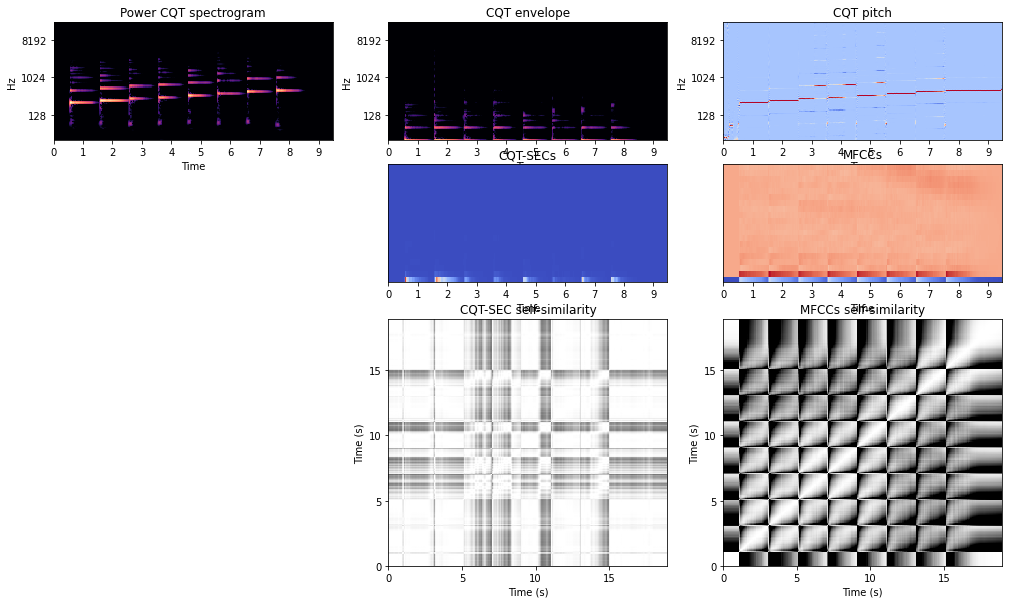

In [32]:
%matplotlib inline

import numpy as np
import librosa
import cqtsec
import matplotlib.pyplot as plt
import librosa.display

# Load an audio signal
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
sampling_frequency = 16000
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)

# Set the different parameters
window_length = pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency))))
step_length = int(window_length / 2)
minimum_frequency = 32.70
octave_resolution = 12
number_coefficients = 20

# Compute the CQT spectrogram, envelope, and pitch, the CQT-SECs, and the MFCCs
cqt_spectrogram = np.power(cqtsec.cqt(audio_signal, sampling_frequency, step_length, minimum_frequency, octave_resolution), 2)
cqt_envelope, cqt_pitch = cqtsec.cqtdeconv(cqt_spectrogram)
cqt_sec = cqtsec.cqtsec(cqt_envelope, octave_resolution, number_coefficients)
audio_mfcc = cqtsec.mfcc(audio_signal, sampling_frequency, window_length, step_length, number_coefficients)

# Compute the self-similarity for the CQT-SECs and the MFCCs
cqt_sec0 = cqt_sec/(np.sqrt(np.sum(np.power(cqt_sec, 2), axis=0))+1e-16)
cqtsec_selfsimilarity = np.matmul(cqt_sec0.T, cqt_sec0)
audio_mfcc0 = audio_mfcc/(np.sqrt(np.sum(np.power(audio_mfcc, 2), axis=0))+1e-16)
mfcc_selfsimilarity = np.matmul(audio_mfcc0.T, audio_mfcc0)

# Display everything
plt.figure(figsize=(17, 10))
plt.subplot(4, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram), x_axis='time', y_axis='cqt_hz', sr=sampling_frequency, 
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
plt.title('Power CQT spectrogram')
plt.subplot(4, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope), x_axis='time', y_axis='cqt_hz', sr=sampling_frequency, 
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
plt.title('CQT envelope')
plt.subplot(4, 3, 3)
librosa.display.specshow(cqt_pitch, x_axis='time', y_axis='cqt_hz', sr=sampling_frequency, hop_length=step_length, 
                         fmin=minimum_frequency, bins_per_octave=octave_resolution)
plt.title('CQT pitch')
plt.subplot(4, 3, 5)
librosa.display.specshow(cqt_sec, x_axis='time')
plt.title('CQT-SECs')
plt.subplot(4, 3, 6)
librosa.display.specshow(audio_mfcc, x_axis='time')
plt.title('MFCCs')
plt.subplot(2, 3, 5)
plt.title('CQT-SEC self-similarity')
librosa.display.specshow(cqtsec_selfsimilarity, x_axis='s', y_axis='s', hop_length=step_length, cmap="gray", vmin=0.9, vmax=1)
plt.subplot(2, 3, 6)
librosa.display.specshow(mfcc_selfsimilarity, x_axis='s', y_axis='s', hop_length=step_length, cmap="gray", vmin=0.9, vmax=1)
plt.title('MFCCs self-similarity')
plt.show()

C:\Users\zarafii2001\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


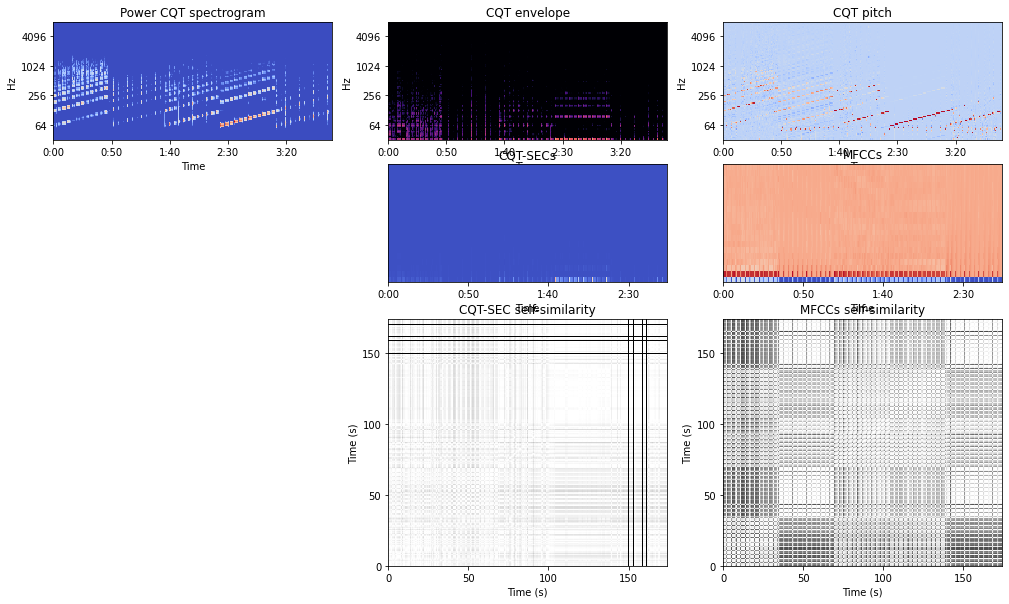

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import cqtsec
import matplotlib.pyplot as plt

# Define the parameters
folder_path = r'C:\Users\zarafii2001\Gracenote\Data\nsynth'
instrument_names = ['brass_acoustic_000', 'guitar_acoustic_000', 'keyboard_acoustic_000', 'reed_acoustic_000', 
                    'string_acoustic_000']
note_number = 24+12
note_numbers = np.arange(note_number, note_number+12)
velocity_number = 75
sampling_frequency = 16000

# Initialize the audio signal
audio_signal = np.empty(0)

# Loop over the instrument names and note numbers
for instrument_name in instrument_names:
    for note_number in note_numbers:
    
        # Get the path to the file
        file_name = f'{instrument_name}-{note_number:03d}-{velocity_number:03d}.wav'
        file_path = os.path.join(folder_path, file_name)
        
        # Load the current audio signal and concatenate them
        audio_signal1, _ = librosa.load(file_path, sr=sampling_frequency, mono=True)
        audio_signal = np.concatenate((audio_signal, audio_signal1))


# Define the parameters
window_length = pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency))))
step_length = int(window_length / 2)
minimum_frequency = 32.70
octave_resolution = 12
number_coefficients = 20

# Compute the CQT spectrogram, envelope, and pitch, the CQT-SECs, and the MFCCs
cqt_spectrogram = np.power(cqtsec.cqt(audio_signal, sampling_frequency, step_length, minimum_frequency, octave_resolution), 2)
cqt_envelope, cqt_pitch = cqtsec.cqtdeconv(cqt_spectrogram)
cqt_sec = cqtsec.cqtsec(cqt_envelope, octave_resolution, number_coefficients)
audio_mfcc = cqtsec.mfcc(audio_signal, sampling_frequency, window_length, step_length, number_coefficients)

# Compute the self-similarity for the CQT-SECs and the MFCCs
cqt_sec0 = cqt_sec/(np.sqrt(np.sum(np.power(cqt_sec, 2), axis=0))+1e-16)
cqtsec_selfsimilarity = np.matmul(cqt_sec0.T, cqt_sec0)
audio_mfcc0 = audio_mfcc/(np.sqrt(np.sum(np.power(audio_mfcc, 2), axis=0))+1e-16)
mfcc_selfsimilarity = np.matmul(audio_mfcc0.T, audio_mfcc0)

# Display everything
plt.figure(figsize=(17, 10))
plt.subplot(4, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram), x_axis='time', y_axis='cqt_hz', sr=sampling_frequency, 
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
plt.title('Power CQT spectrogram')
plt.subplot(4, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope), x_axis='time', y_axis='cqt_hz', sr=sampling_frequency, 
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
plt.title('CQT envelope')
plt.subplot(4, 3, 3)
librosa.display.specshow(cqt_pitch, x_axis='time', y_axis='cqt_hz', sr=sampling_frequency, hop_length=step_length, 
                         fmin=minimum_frequency, bins_per_octave=octave_resolution)
plt.title('CQT pitch')
plt.subplot(4, 3, 5)
librosa.display.specshow(cqt_sec, x_axis='time')
plt.title('CQT-SECs')
plt.subplot(4, 3, 6)
librosa.display.specshow(audio_mfcc, x_axis='time')
plt.title('MFCCs')
plt.subplot(2, 3, 5)
plt.title('CQT-SEC self-similarity')
librosa.display.specshow(cqtsec_selfsimilarity, x_axis='s', y_axis='s', hop_length=step_length, cmap="gray", vmin=0.5, vmax=1)
plt.subplot(2, 3, 6)
librosa.display.specshow(mfcc_selfsimilarity, x_axis='s', y_axis='s', hop_length=step_length, cmap="gray", vmin=0.5, vmax=1)
plt.title('MFCCs self-similarity')
plt.show()

## 01. Assumption and observations

### 01.1. Assumption

A log-spectrum, such as the CQT-spectrum, can be represented as the convolution of a pitch-independent spectral envelope component (~ timbre) and a energy-normalized pitch component.

`X = E * P`

### 01.2. Observation 1

A pitch change in the audio translates to a linear shift in the log-spectrum. 

This means that the same musical object at different pitches should have a similar envelope component but a shifted pitch component; while two different musical objects at the same pitch should have different envelope components but a similar pitch component.

- `X = E * P`

- `X2 = E2 * P2`

`=> E ~ E2`

#### Example 1: Two sinusoids at different pitches and their CQT-spectrogram

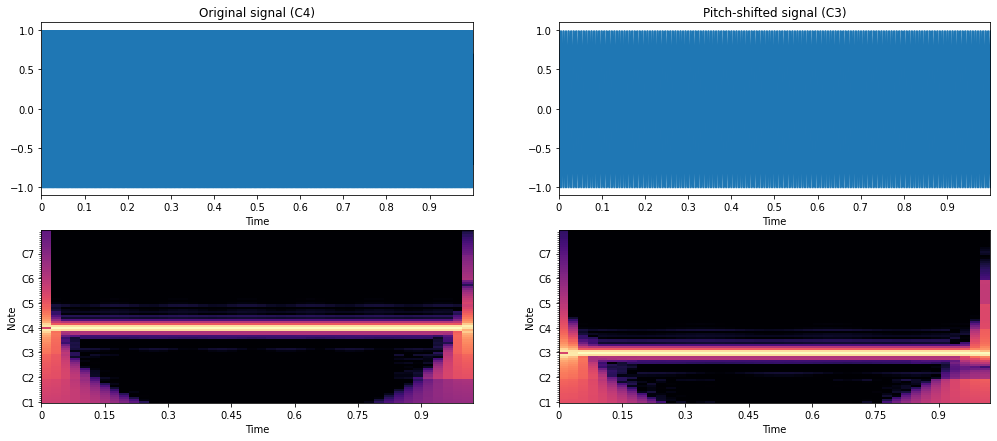

In [10]:
%matplotlib inline

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define two sinusoids, with one twice lower in frequency than the other one
sampling_frequency = 44100                                     # In Hz
time_duration = 1                                              # In seconds
time_array = np.arange(0, time_duration, 1/sampling_frequency) # In seconds
frequency_value1 = 261.63                                      # In Hz (= C4)
frequency_value2 = frequency_value1/2                          # In Hz (= C3)
audio_signal1 = np.sin(time_array*2*np.pi*frequency_value1)
audio_signal2 = np.sin(time_array*2*np.pi*frequency_value2)

# Comptute the CQT spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their waveform in seconds and their power CQT spectrogram in seconds and notes
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
librosa.display.waveplot(audio_signal1, sr=sampling_frequency)
plt.title('Original signal (C4)')
plt.subplot(2, 2, 2)
librosa.display.waveplot(audio_signal2, sr=sampling_frequency)
plt.title('Pitch-shifted signal (C3)')
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram1, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.show()

#### Example 2: Two notes at different pitches and their CQT-spectrogram

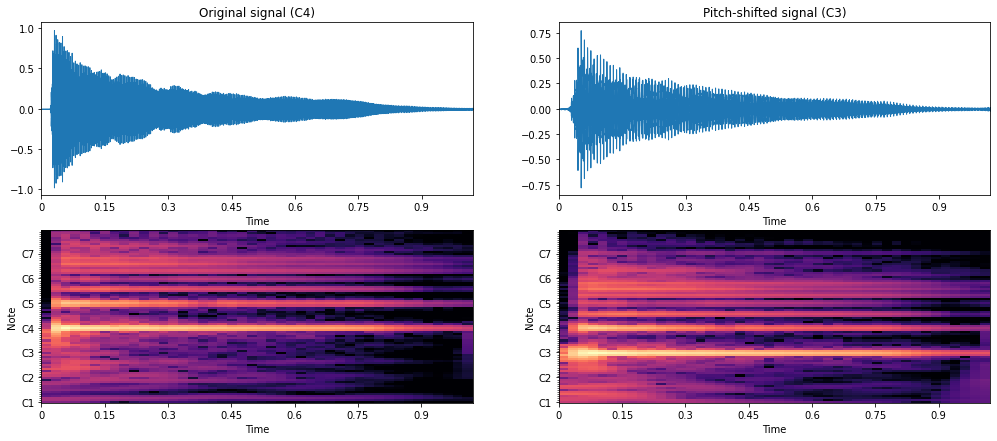

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their waveform in seconds and their power CQT spectrogram in seconds and notes
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
librosa.display.waveplot(audio_signal1, sr=sampling_frequency)
plt.title('Original signal (C4)')
plt.subplot(2, 2, 2)
librosa.display.waveplot(audio_signal2, sr=sampling_frequency)
plt.title('Pitch-shifted signal (C3)')
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram1, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.show()

### 01.3. Observation 2

The Fourier transform (FT) of a convolution of two functions is equal to the point-wise product of their FTs (convolution theorem).

- `F(X) = F(E) . F(P)`
- `F(X2) = F(E2) . F(P2)`

`=> F(E) ~ F(E2)`

#### Example: Direct vs indirect convolution

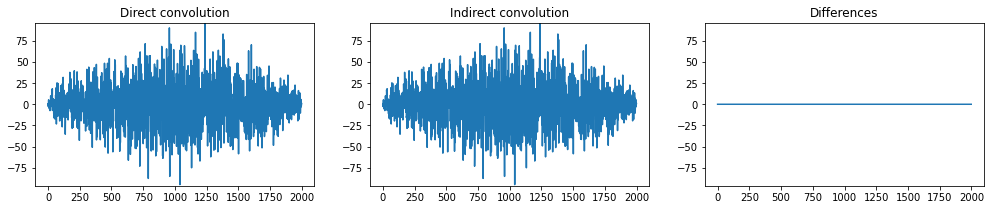

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define two arrays
number_elements = 1000
data_array1 = np.random.normal(size=number_elements)
data_array2 = np.random.normal(size=number_elements)

# Compute the direct convolution between them
data_convolution = np.convolve(data_array1, data_array2)

# Compute the convolution using the convolution theorem
ft_array1 = np.fft.fft(data_array1, 2*number_elements-1)
ft_array2 = np.fft.fft(data_array2, 2*number_elements-1)
data_convolution2 = np.real(np.fft.ifft(ft_array1*ft_array2))

# Display the convolutions and their differences
maximum_value = max(abs(data_convolution))
plt.figure(figsize=(17, 3))
plt.subplot(1, 3, 1)
plt.plot(data_convolution), plt.ylim(-maximum_value, maximum_value), plt.title('Direct convolution')
plt.subplot(1, 3, 2)
plt.plot(data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title('Indirect convolution')
plt.subplot(1, 3, 3)
plt.plot(data_convolution-data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title('Differences')
plt.show()

### 01.4. Observation 3

The magnitude FT is shift-invariant.

- `F(X) = abs(F(X)) . exp(j*angle(F(X)))`

- `F(X2) = abs(F(X2)) . exp(j*angle(F(X2)))`

`=> abs(F(X)) ~ abs(F(X2))`

Conclusion:

`=> F(E) ~ abs(F(X)) => E ~ F-1(abs(F(X))) and P ~ F-1(exp(j*angle(F(X))))`

#### Example 1: An array and a shifted version of it, and their magnitude FT

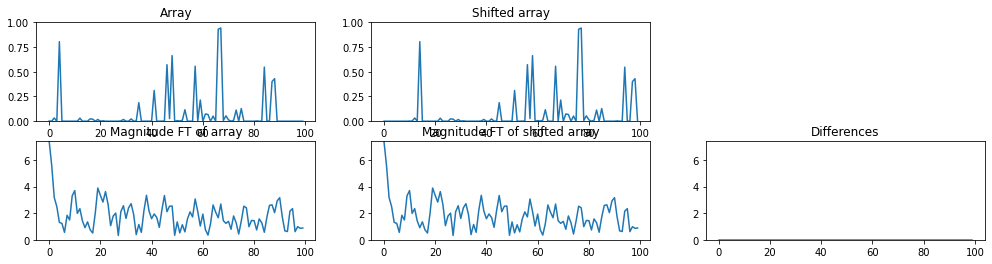

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define a non-negative array and a shifted version of it
number_elements = 100
delay_size = 10
data_array1 = np.concatenate((np.power(np.random.rand(number_elements-delay_size), 10), np.zeros(delay_size)))
data_array2 = np.concatenate((np.zeros(delay_size), data_array1[0:number_elements-delay_size]))

# Compute the magnitude FT of the arrays
absft_array1 = abs(np.fft.fft(data_array1, 2*number_elements-1))[0:number_elements]
absft_array2 = abs(np.fft.fft(data_array2, 2*number_elements-1))[0:number_elements]

# Display the arrays and magnitude FTs
maximum_value = max(np.max(absft_array1), np.max(absft_array2))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(data_array1), plt.ylim(0, 1), plt.title('Array')
plt.subplot(2, 3, 2), plt.plot(data_array2), plt.ylim(0, 1), plt.title('Shifted array')
plt.subplot(2, 3, 4), plt.plot(absft_array1), plt.ylim(0, maximum_value), plt.title('Magnitude FT of array')
plt.subplot(2, 3, 5), plt.plot(absft_array2), plt.ylim(0, maximum_value), plt.title('Magnitude FT of shifted array')
plt.subplot(2, 3, 6), plt.plot(abs(absft_array1-absft_array2)), plt.ylim(0, maximum_value), plt.title('Differences')
plt.show()

#### Example 2: A CQT spectrum and a pitch-shifted version of it, and their magnitude FT

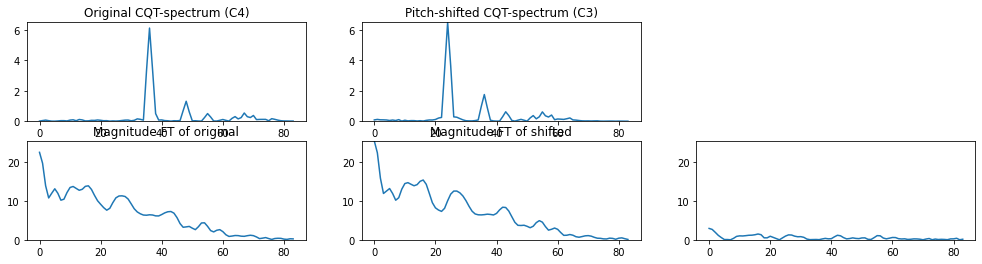

In [31]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT-spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))
number_frequencies = np.shape(audio_spectrogram1)[0]

# Compute the magnitude FT of the CQT-spectrograms
absft_spectrogram1 = abs(np.fft.fft(audio_spectrogram1, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]
absft_spectrogram2 = abs(np.fft.fft(audio_spectrogram2, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]

# Display their waveform in seconds and their power CQT-spectrogram in seconds and notes
i = 10
audio_maximum = max(np.max(abs(audio_spectrogram1[:, i])), np.max(abs(audio_spectrogram2[:, i])))
absft_maximum = max(np.max(abs(absft_spectrogram1[:, i])), np.max(abs(absft_spectrogram2[:, i])))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(audio_spectrogram1[:, i]), plt.ylim(0, audio_maximum), plt.title('Original CQT-spectrum (C4)')
plt.subplot(2, 3, 2), plt.plot(audio_spectrogram2[:, i]), plt.ylim(0, audio_maximum), plt.title('Pitch-shifted CQT-spectrum (C3)')
plt.subplot(2, 3, 4), plt.plot(absft_spectrogram1[:, i]), plt.ylim(0, absft_maximum), plt.title('Magnitude FT of original')
plt.subplot(2, 3, 5), plt.plot(absft_spectrogram2[:, i]), plt.ylim(0, absft_maximum), plt.title('Magnitude FT of shifted')
plt.subplot(2, 3, 6), plt.plot(abs(absft_spectrogram1[:, i]-absft_spectrogram2[:, i])), plt.ylim(0, absft_maximum)
plt.show()

## 02. Preliminary Tests

### 02.1. Compare librosa's and zaf's CQT-spectrogram and MFCC

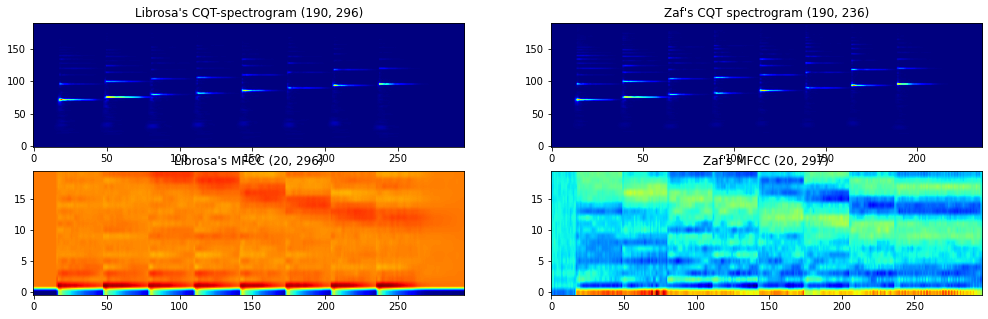

In [33]:
import numpy as np
import librosa
import zaf
import scipy.signal
import matplotlib.pyplot as plt

# Load an audio file in mono
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
sampling_frequency = 16000
audio_signal, sampling_frequency = librosa.load(file_path, sr=sampling_frequency, mono=True)

# Define some parameters
window_length = pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency))))
step_length = int(window_length/2)
window_function = scipy.signal.hamming(window_length, sym=False)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/2
octave_resolution = 24
time_resolution = 25
number_mels = 40
number_coefficients = 20

# Compute the CQT-spectrogram using librosa and zaf
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                     fmin=minimum_frequency, n_bins=number_frequencies, bins_per_octave=octave_resolution))
cqt_kernel = zaf.cqtkernel(sampling_frequency, octave_resolution, minimum_frequency, maximum_frequency)
cqt_spectrogram2 = zaf.cqtspectrogram(audio_signal, sampling_frequency, time_resolution, cqt_kernel)

# Compute the MFCCs using librosa and zaf
audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_mfcc=number_coefficients, \
                                  hop_length=step_length)
mel_filterbank = zaf.melfilterbank(sampling_frequency, window_length, number_mels)
audio_mfcc2 = zaf.mfcc(audio_signal, window_function, step_length, mel_filterbank, number_coefficients)

# Display the CQT-spectrograms and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(2, 2, 1)
plt.imshow(cqt_spectrogram, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Librosa's CQT-spectrogram {np.shape(cqt_spectrogram)}")
plt.subplot(2, 2, 2)
plt.imshow(cqt_spectrogram2, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Zaf's CQT spectrogram {np.shape(cqt_spectrogram2)}")
plt.subplot(2, 2, 3)
plt.imshow(audio_mfcc, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Librosa's MFCC {np.shape(audio_mfcc)}")
plt.subplot(2, 2, 4)
plt.imshow(audio_mfcc2, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Zaf's MFCC {np.shape(audio_mfcc2)}")
plt.show()

### 02.2. Test decomposing the CQT-spectrogram into a CQT-envelope and a CQT-pitch

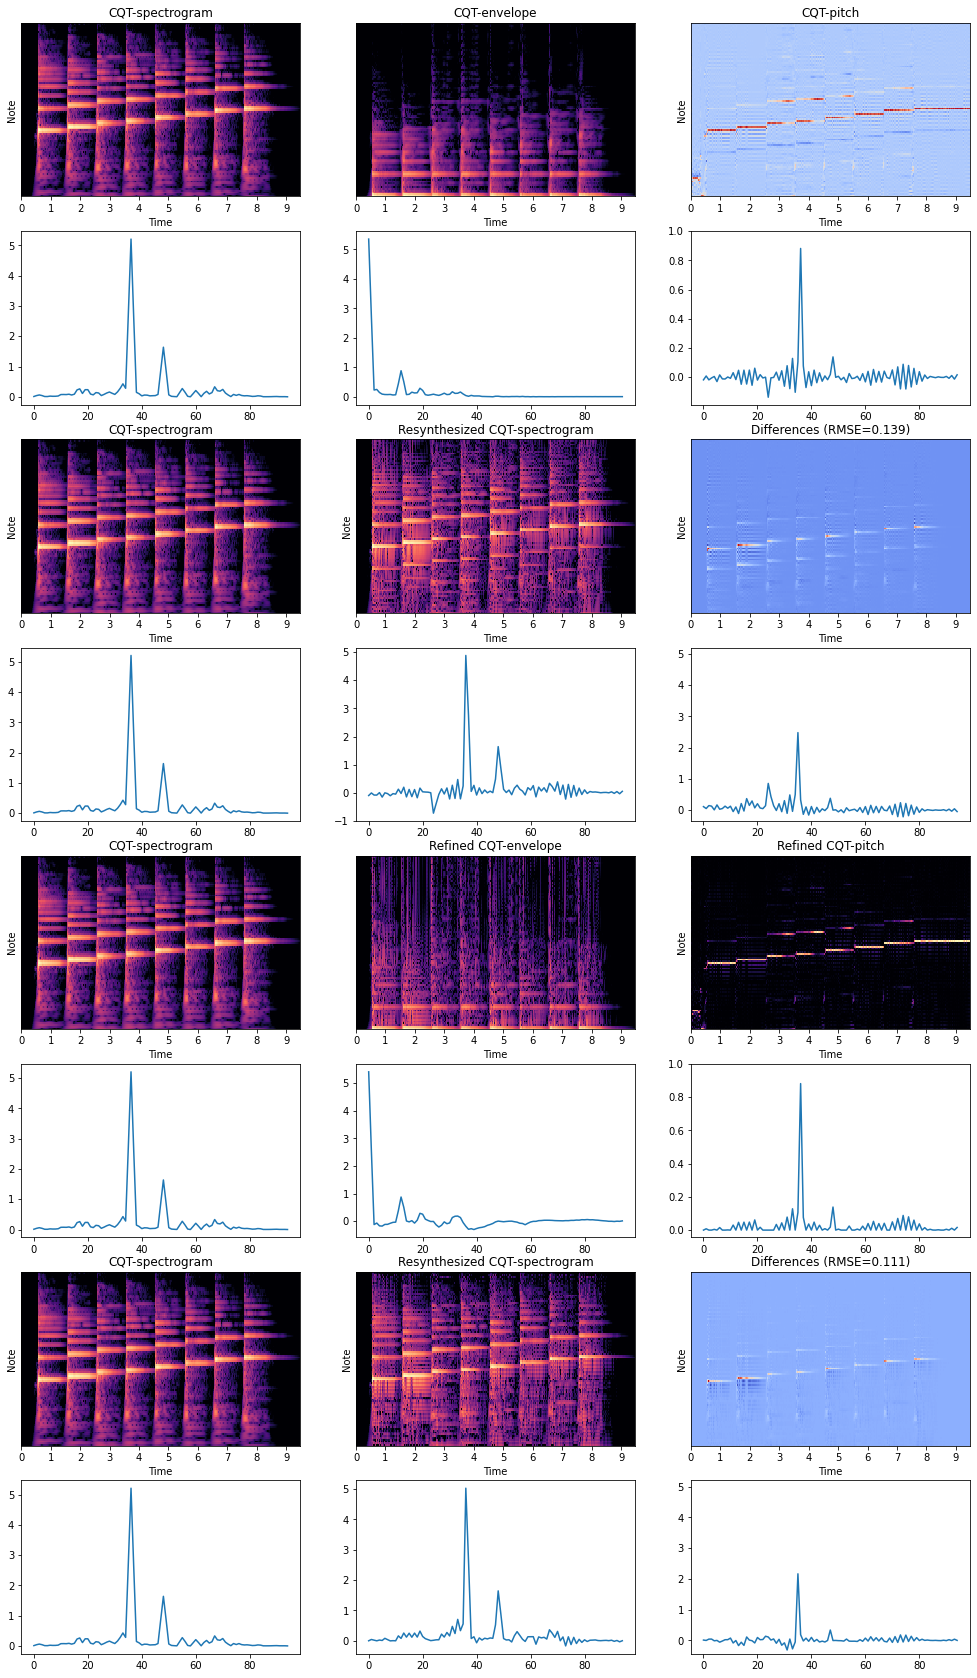

In [34]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)

# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
# file_path = r'557469__oleviolin__d-scale-violin.wav'
sampling_frequency = 16000
audio_signal, _ = librosa.load(file_path, sr=sampling_frequency, mono=True)

# Comptute the CQT-spectrogram of the signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/2
octave_resolution = 12
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
audio_cqt = librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                        n_bins=number_frequencies, bins_per_octave=octave_resolution)
cqt_spectrogram = np.abs(audio_cqt)
number_times = np.shape(cqt_spectrogram)[1]

# Derive the CQT-envelope and the CQT-pitch
ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
absftcqt_spectrogram = abs(ftcqt_spectrogram)
cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/absftcqt_spectrogram, axis=0)[0:number_frequencies, :])

# Resynthesize the spectrogram by convolving the CQT-envelope and CQT-pitch
cqt_spectrogram2 = np.zeros((number_frequencies, number_times))
for i in range(number_times):
    cqt_spectrogram2[:, i] = np.convolve(cqt_envelope[:, i], cqt_pitch[:, i])[0:number_frequencies]

# Display the CQT-spectrogram, CQT-envelope and CQT-pitch, the resynthesized CQT-spectrogram, and the differences
j = 20
plt.figure(figsize=(17, 30))
plt.subplot(8, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title('CQT-envelope')
plt.subplot(8, 3, 3)
librosa.display.specshow(cqt_pitch, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title('CQT-pitch')
plt.subplot(8, 3, 4)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 5)
plt.plot(cqt_envelope[:, j])
plt.subplot(8, 3, 6)
plt.plot(cqt_pitch[:, j])
plt.ylim(top=1)
plt.subplot(8, 3, 7)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 8)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('Resynthesized CQT-spectrogram')
plt.subplot(8, 3, 9)
librosa.display.specshow(cqt_spectrogram-cqt_spectrogram2, sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
rmse_value = np.round(np.sqrt(np.mean(np.power(cqt_spectrogram-cqt_spectrogram2, 2))), 3)
plt.title(f'Differences (RMSE={rmse_value})')
plt.subplot(8, 3, 10)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 11)
plt.plot(cqt_spectrogram2[:, j])
plt.subplot(8, 3, 12)
plt.plot(cqt_spectrogram[:, j]-cqt_spectrogram2[:, j])
plt.ylim(top=max(cqt_spectrogram[:, j]))

# Refine the CQT-pitch, and then the CQT-envelope
cqt_pitch2 = np.copy(cqt_pitch)
cqt_pitch2[cqt_pitch2 < 0] = 0
cqt_envelope2 = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch2, 2*number_frequencies-1, axis=0)+1e-7), \
                                    axis=0)[0:number_frequencies, :])

# Resynthesize the spectrogram by convolving the refined CQT-envelope and CQT-pitch
cqt_spectrogram2 = np.zeros((number_frequencies, number_times))
for i in range(number_times):
    cqt_spectrogram2[:, i] = np.convolve(cqt_envelope2[:, i], cqt_pitch2[:, i])[0:number_frequencies]

# Display the CQT-spectrogram, the refined CQT-envelope and CQT-pitch, the resynthesized CQT-spectrogram, and the differences
plt.subplot(8, 3, 13)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 14)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title('Refined CQT-envelope')
plt.subplot(8, 3, 15)
librosa.display.specshow(cqt_pitch2, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title('Refined CQT-pitch')
plt.subplot(8, 3, 16)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 17)
plt.plot(cqt_envelope2[:, j])
plt.subplot(8, 3, 18)
plt.plot(cqt_pitch2[:, j])
plt.ylim(top=1)
plt.subplot(8, 3, 19)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 20)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('Resynthesized CQT-spectrogram')
plt.subplot(8, 3, 21)
librosa.display.specshow(cqt_spectrogram-cqt_spectrogram2, sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
rmse_value = np.round(np.sqrt(np.mean(np.power(cqt_spectrogram-cqt_spectrogram2, 2))), 3)
plt.title(f'Differences (RMSE={rmse_value})')
plt.subplot(8, 3, 22)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 23)
plt.plot(cqt_spectrogram2[:, j])
plt.subplot(8, 3, 24)
plt.plot(cqt_spectrogram[:, j]-cqt_spectrogram2[:, j])
plt.ylim(top=max(cqt_spectrogram[:, j]))
plt.show()

# # Resynthesize the signal
# audio_signal2 = librosa.icqt(cqt_spectrogram2*audio_cqt/cqt_spectrogram, sr=sampling_frequency, \
#                              hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
# audio_signal2 = np.max(abs(audio_signal))*audio_signal2/np.max(abs(audio_signal2))
# audio_signal2 = np.pad(audio_signal2, (0, len(audio_signal)-len(audio_signal2)), 'constant', constant_values=0)

### 02.3. Test extracting the CQT-spectral envelope coefficients (CQT-SEC) directly

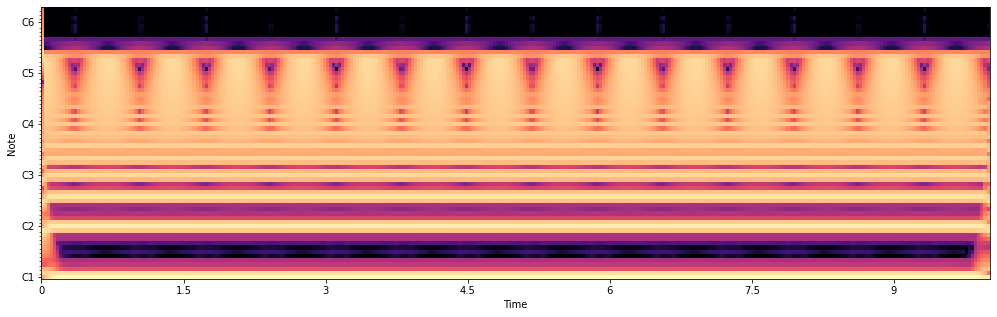

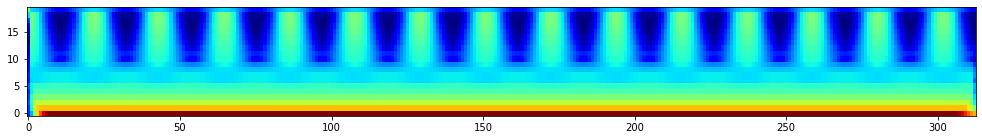

In [47]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)

# Build a harmonic signal
sampling_frequency = 16000                                     # In Hz
time_duration = 10                                             # In seconds
time_array = np.arange(0, time_duration, 1/sampling_frequency) # In seconds
number_harmonics = 20
frequency_values = 32.70*np.arange(1, number_harmonics+1)      # in Hz
number_samples = len(time_array)
audio_signal = np.zeros(number_samples)
for frequency_value in frequency_values:
    audio_signal = audio_signal+np.sin(time_array*2*np.pi*frequency_value)

# Comptute the CQT-spectrogram of the harmonic signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = frequency_values[0]
maximum_frequency = 2*frequency_values[-1]
octave_resolution = 12
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                                     n_bins=number_frequencies, bins_per_octave=octave_resolution))
plt.figure(figsize=(17, 5))
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.show()

# Extract the CQT-spectral envelope coefficients (CQT-SEC)
coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_harmonics+1))).astype(int)
cqt_sec = cqt_spectrogram[coefficient_indices, :]
plt.figure(figsize=(17, 2))
plt.imshow(cqt_sec, aspect='auto', cmap='jet', origin='lower')
plt.show()

### 02.4. Compare the CQT-SECs to the MFCCs on one audio file

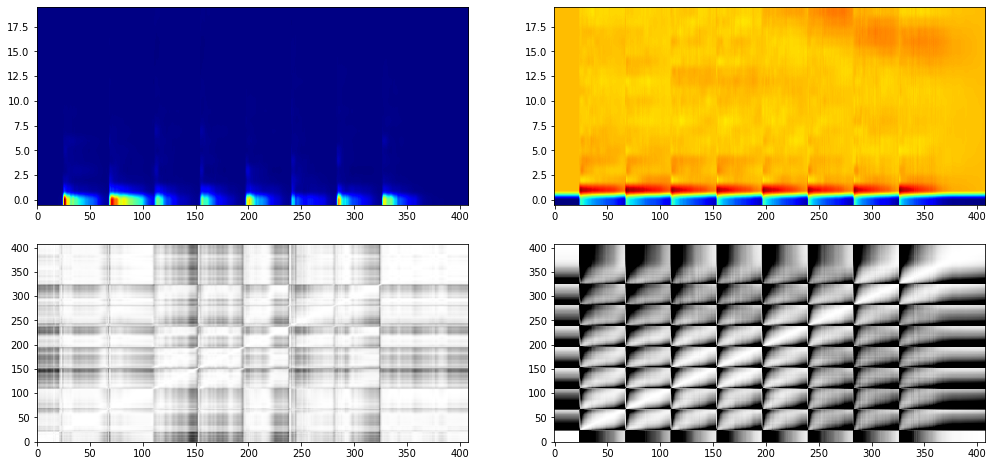

In [35]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define a function to compute the CQT spectral envelope coefficients (CQT-SEC)
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                         fmin=minimum_frequency, n_bins=number_frequencies, \
                                         bins_per_octave=octave_resolution))
    
    # Derive the CQT-envelope and the CQT-pitch
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-6), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]
    
    return cqt_sec


# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Define a function to compute a self-similarity matrix using the cosine similarity
def ssm(audio_feature):
    
    # Normalize the columns by their Euclidean norm
    audio_feature0 = audio_feature/(np.sqrt(np.sum(np.power(audio_feature, 2), axis=0))+1e-16)
    
    # Multiple the normalized columns with each other
    similarity_matrix = np.matmul(audio_feature0.T, audio_feature0)
    
    return similarity_matrix
    
    
# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
# file_path = r'557469__oleviolin__d-scale-violin.wav'
sampling_frequency = 16000
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
# Compute the CQT-SECs and the MFCCs
cqt_sec = cqtsec(audio_signal, sampling_frequency)
audio_mfcc = mfcc(audio_signal, sampling_frequency)

# Compute the self-similarity matrices using the cosine similarity
similarity_matrix = ssm(cqt_sec)
similarity_matrix2 = ssm(audio_mfcc)

# Display everything
plt.figure(figsize=(17, 8))
plt.subplot(2, 2, 1)
plt.imshow(cqt_sec, cmap='jet', aspect='auto', origin='lower')
plt.subplot(2, 2, 2)
plt.imshow(audio_mfcc, cmap='jet', aspect='auto', origin='lower')
plt.subplot(2, 2, 3)
plt.imshow(similarity_matrix, cmap='gray', aspect='auto', origin='lower', vmin=0.9, vmax=1)
plt.subplot(2, 2, 4)
plt.imshow(similarity_matrix2, cmap='gray', aspect='auto', origin='lower', vmin=0.9, vmax=1)
plt.show()

## 03. Test on a Small Dataset

### 03.1. Create a small dataset from the full NSynth dataset (DONE)

In [105]:
import os
from shutil import copyfile

# Create a small dataset from the large NSynth dataset
folder_path = r'C:\Users\zarafii2001\Gracenote\Data\nsynth'
folder_path2 = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
instrument_list = [{'name':'bass_acoustic', 'number': '000', 'midi': 24}, \
                   {'name':'brass_acoustic', 'number': '000', 'midi': 60}, \
                   {'name':'flute_acoustic', 'number': '000', 'midi': 60}, \
                   {'name':'guitar_acoustic', 'number': '000', 'midi': 60}, \
                   {'name':'keyboard_acoustic', 'number': '000', 'midi': 60}, \
                   {'name':'mallet_acoustic', 'number': '000', 'midi': 72}, \
                   {'name':'organ_electronic', 'number': '000', 'midi': 60}, \
                   {'name':'reed_acoustic', 'number': '000', 'midi': 60}, \
                   {'name':'string_acoustic', 'number': '000', 'midi': 60}, \
                   {'name':'synth_lead_synthetic', 'number': '000', 'midi': 60}, \
                   {'name':'vocal_acoustic', 'number': '002', 'midi': 60}]
number_semitones = 12
for i in instrument_list:
    for j in range(i['midi'], i['midi']+number_semitones):
        file_name = f'{i['name']}_{i['number']}-{j:03d}-075.wav'
        file_path = os.path.join(folder_path, file_name)
        file_path2 = os.path.join(folder_path2, file_name)
        copyfile(file_path, file_path2)

### 03.2. Compute the CQT-SECs and the MFCCs on the small dataset

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]


    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
    # Display the name of the file
    print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)

### 03.3. Compare the note similarities for the CQT-SECs and the MFCCs

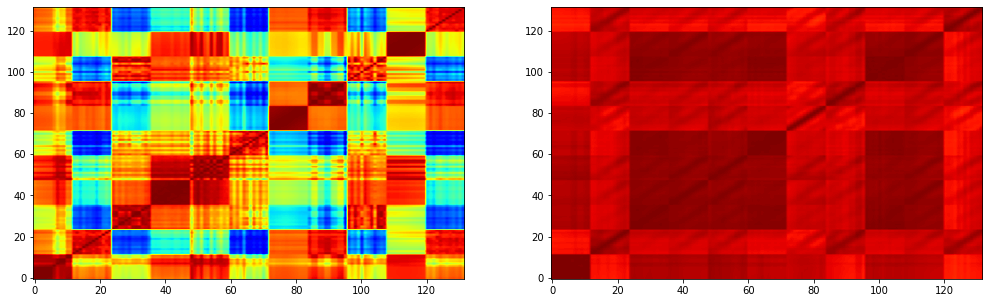

In [4]:
# Initialize the note similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_similarities = np.zeros((number_files, number_files))
mfcc_similarities = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the note similarity between the CQT-SECs and between the MFCCs
        cqtsec_similarities[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_similarities[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Display the note similarity matrices for the CQT-SECs and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.subplot(1, 2, 2)
plt.imshow(mfcc_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.show()

### 03.4. Compare the instrument similarities for the CQT-SECs and the MFCCs

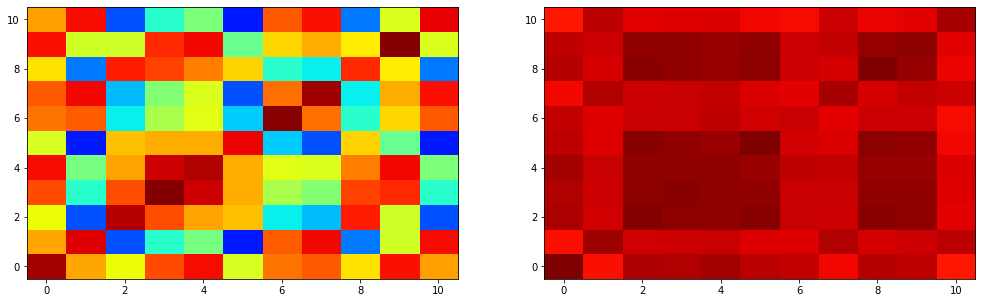

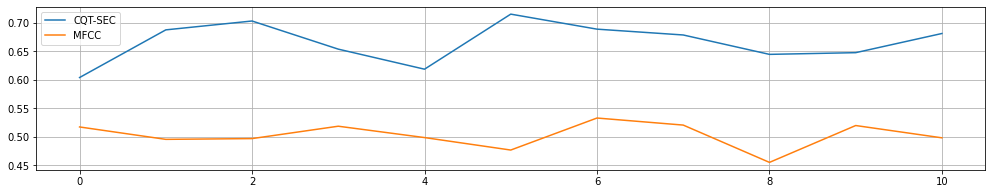

In [6]:
# Initialize the instrument similarity matrices and the final score vectors
number_instruments = 11
cqtsec_similarities2 = np.zeros((number_instruments, number_instruments))
mfcc_similarities2 = np.zeros((number_instruments, number_instruments))
cqtsec_scores2 = np.zeros(number_instruments)
mfcc_scores2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instruments
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_similarities2[i, j] = np.mean(cqtsec_similarities[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_similarities2[i, j] = np.mean(mfcc_similarities[i*12:(i+1)*12, j*12:(j+1)*12])

# Display the instrument similarity matrices
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_similarities2, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.subplot(1, 2, 2)
plt.imshow(mfcc_similarities2, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.show()

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_scores2[i] = (cqtsec_similarities2[i, i] \
    + 1-((np.sum(cqtsec_similarities2[i, :])-cqtsec_similarities2[i, i])/(number_instruments-1)))/2
    mfcc_scores2[i] = (cqtsec_similarities2[i, i] \
    + 1-((np.sum(mfcc_similarities2[i, :])-mfcc_similarities2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.figure(figsize=(17, 3))
plt.plot(cqtsec_scores2, label='CQT-SEC')
plt.plot(mfcc_scores2, label='MFCC')
plt.grid()
plt.legend()
plt.show()

### 03.5. Compare the instrument similarity scores for different versions of the CQT-SECs, and the MFCCs

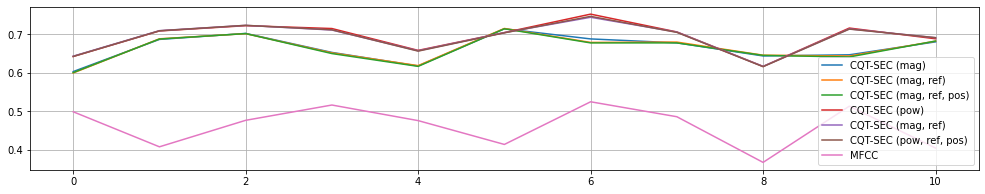

In [33]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 3))



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]
    
    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag, ref)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
    cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag, ref, pos)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (pow)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag, ref)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
    cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (pow, ref, pos)')
plt.plot(mfcc_vector2, label='MFCC')



plt.grid()
plt.legend()
plt.show()

## 04. Test on the full NSynth dataset

### 04.1. Compute the CQT-SECs and the MFCCs on the full NSynth dataset (DONE)

In [ ]:
import os
import pickle
import numpy as np
import librosa

# Define a function to compute the CQT-SECs
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the power CQT-spectrogram
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the CQT-SECs
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_envelope = np.real(np.fft.ifft(abs(np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)), axis=0) \
                           [0:number_frequencies, :])
    cqt_sec = cqt_envelope[coefficient_indices, :]
    
    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Get the paths to the folders
folder_path = r'C:\Users\zarafii2001\Gracenote\Data\nsynth'
folder_path2 = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_features'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Loop over the files
i = 0
for file_name in folder_listdir:
    i = i+1
    
    # Display the name of the file
    print(f'{i}/{number_files}: {file_name}')
    
    # Get the full path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs from the audio signal
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current audio features and save it in a pkl file
    audio_dict = {'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    file_path2 = os.path.join(folder_path2, file_name[0:-4]+'.pkl')
    pickle.dump(audio_dict, open(file_path2,'wb'))

### 04.2. Compute the instrument similarities for the CQT-SECs and the MFCCs for every file (DONE)

In [ ]:
import os
import pickle
import numpy as np
import librosa

# Get the path to the folder and the list of files
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_features'
folder_listdir = os.listdir(folder_path)

# Initialize an array with the instruments indices for all the files
number_files = len(folder_listdir)
instrument_indices = np.empty(number_files)

# Initialize the previous unique instrument name and the instrument index
instrument_name0 = '0'
j = -1

# Loop over the list of files
for i in range(number_files):
    
    # Get the name of the instrument
    # (with the instrument number but not the note and velocity numbers)
    instrument_name = folder_listdir[i].split('-')[0]
    
    # Update the instrument counter and previous unique name if it is a new instrument
    if instrument_name != instrument_name0:
        j = j+1
        instrument_name0 = instrument_name
    
    # Update the instrument index
    instrument_indices[i] = j

# Make sure the indices are int
instrument_indices = instrument_indices.astype(int)
    
# Initialize arrays for all the features, flatten and nornalized
feature_size = 20*126
cqt_secs = np.empty((feature_size, number_files))
audio_mfccs = np.empty((feature_size, number_files))

# Loop over the files to store the features, flatten and normalized
for i in range(0, number_files):
    
    # Get the file name, the full path to the feature file, and load the feature dictionary
    file_name = folder_listdir[i]
    file_path = os.path.join(folder_path, file_name)
    audio_dict = pickle.load(open(file_path, 'rb'))
    print(f'{i+1}/{number_files}: {file_name}')
    
    # Get the CQT-SECs and MFCCs, flatten them and normalize them
    cqt_sec = audio_dict['cqt-sec'].flatten()
    cqt_secs[:, i] = cqt_sec/(np.sqrt(np.sum(np.power(cqt_sec, 2)))+1e-16)
    audio_mfcc = audio_dict['mfcc'].flatten()
    audio_mfccs[:, i] = audio_mfcc/(np.sqrt(np.sum(np.power(audio_mfcc, 2)))+1e-16)

In [ ]:
# Get the path to the similarity folder
folder_path2 = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_similarities'

# Define the number of instruments
number_instruments = 1006

# Loop over the files to compute the similarities
for i in range(0, number_files-1):
    
    # Get the file name and the full path to the similarity file
    file_name = folder_listdir[i]
    file_path2 = os.path.join(folder_path2, file_name)
    print(f'{i+1}/{number_files-1}: {file_name}')
    
    # If the similarity file does not already exist
    if not os.path.isfile(file_path2):
        
        # Compute the cosine similarity between the current feature and all the others
        cqtsec_similarities = np.matmul(cqt_secs[:, i], cqt_secs[:, i+1:])
        mfcc_similarities = np.matmul(audio_mfccs[:, i], audio_mfccs[:, i+1:])
        
        # Initialize the instrument similarities for the current file
        cqtsec_similarities2 = np.zeros(number_instruments)
        mfcc_similarities2 = np.zeros(number_instruments)
        
        # Loop over the other files
        l = 0
        for j in range(i+1, number_files):
            
            # Get the instrument index
            k = instrument_indices[j]
            
            # Update the instrument similarities
            cqtsec_similarities2[k] = cqtsec_similarities2[k]+cqtsec_similarities[l]
            mfcc_similarities2[k] = mfcc_similarities2[k]+mfcc_similarities[l]
            l = l+1
            
        # Create a similarity dictionary for the current file and save it
        audio_dict = {'cqt-sec': cqtsec_similarities2, 'mfcc': mfcc_similarities2}
        pickle.dump(audio_dict, open(file_path2,'wb'))

### 04.2.2. Compute the instrument similarities for the CQT-SECs and the MFCCs for every file

In [ ]:
import os
import pickle
import numpy as np
import librosa

# Get the path to the folder and the list of files
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_features'
folder_listdir = os.listdir(folder_path)

# Initialize an array for the instruments indices
instrument_indices = np.empty(0, dtype=int)

# Initialize the previous unique instrument name and the instrument index
instrument_name0 = '0'
i = -1

# Loop over the file names to get the instrument indices
for file_name in folder_listdir:
    
    # Get the velocity number
    file_name = file_name.split('-')
    velocity_number = file_name[2][0:3]
    
    # Check for medium velocity only
    if velocity_number == '075':
        
        # Get the name of the instrument (with the instrument number)
        instrument_name = file_name[0]

        # Update the instrument counter and previous unique name, if it is a new instrument
        if instrument_name != instrument_name0:
            i = i+1
            instrument_name0 = instrument_name

        # Update the instrument index
        instrument_indices = np.append(instrument_indices, i)

        
# Get the full feature size and the number of notes
feature_size = 20*126
number_notes = len(instrument_indices)

# Initialize arrays for all the features, flatten and normalized
cqt_secs = np.zeros((feature_size, number_notes))
audio_mfccs = np.zeros((feature_size, number_notes))

# Loop over the file names to flatten and normalize the features
i = -1
for file_name in folder_listdir:
    
    # Get the velocity number
    velocity_number = file_name.split('-')[2][0:3]
    
    # Check for medium velocity only
    if velocity_number == '075':
        
        # Update the note index
        i = i+1
        
        # Print the counter and the file name
        print(f'{i+1}/{number_notes}: {file_name}')
        
        # Get the the full path to the feature file and load the feature dictionary
        file_path = os.path.join(folder_path, file_name)
        audio_dict = pickle.load(open(file_path, 'rb'))
        
        # Get the CQT-SECs, flatten them and normalize them
        cqt_sec = audio_dict['cqt-sec'].flatten()
        cqt_secs[:, i] = cqt_sec/(np.sqrt(np.sum(np.power(cqt_sec, 2)))+1e-16)
        
        # Get the MFCCs, flatten them and normalize them
        audio_mfcc = audio_dict['mfcc'].flatten()
        audio_mfccs[:, i] = audio_mfcc/(np.sqrt(np.sum(np.power(audio_mfcc, 2)))+1e-16)

In [ ]:
# Get the path to the similarity folder
folder_path2 = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_similarities'

# Get the number of instruments
number_instruments = instrument_indices[-1]+1

# Loop over the file names to compute the similarities
i = -1
for file_name in folder_listdir:
    
    # Get the velocity number
    velocity_number = file_name.split('-')[2][0:3]
    
    # Check for medium velocity only
    if velocity_number == '075':
        
        # Update the note index
        i = i+1
        
        # Print the counter and the file name
        print(f'{i+1}/{number_notes}: {file_name}')
        
        # Get the full path to the similarity file
        file_path2 = os.path.join(folder_path2, file_name)
        
        # If the similarity file does not already exist
        if not os.path.isfile(file_path2):

            # Compute the cosine similarity between the current features and all the others
            cqtsec_similarities = np.matmul(cqt_secs[:, i], cqt_secs[:, i+1:])
            mfcc_similarities = np.matmul(audio_mfccs[:, i], audio_mfccs[:, i+1:])

            # Initialize the instrument similarities for the current file
            cqtsec_similarities2 = np.zeros(number_instruments)
            mfcc_similarities2 = np.zeros(number_instruments)

            # Loop over the other notes
            l = 0
            for j in range(i+1, number_notes):

                # Get the instrument index
                k = instrument_indices[j]

                # Update the instrument similarities
                cqtsec_similarities2[k] = cqtsec_similarities2[k]+cqtsec_similarities[l]
                mfcc_similarities2[k] = mfcc_similarities2[k]+mfcc_similarities[l]
                l = l+1

            # Create a similarity dictionary for the current file and save it
            audio_dict = {'cqt-sec': cqtsec_similarities2, 'mfcc': mfcc_similarities2}
            pickle.dump(audio_dict, open(file_path2,'wb'))

1/60388: bass_acoustic_000-024-075.pkl
2/60388: bass_acoustic_000-025-075.pkl
3/60388: bass_acoustic_000-026-075.pkl
4/60388: bass_acoustic_000-027-075.pkl
5/60388: bass_acoustic_000-028-075.pkl
6/60388: bass_acoustic_000-029-075.pkl
7/60388: bass_acoustic_000-030-075.pkl
8/60388: bass_acoustic_000-031-075.pkl
9/60388: bass_acoustic_000-032-075.pkl
10/60388: bass_acoustic_000-033-075.pkl
11/60388: bass_acoustic_000-034-075.pkl
12/60388: bass_acoustic_000-035-075.pkl
13/60388: bass_acoustic_000-036-075.pkl
14/60388: bass_acoustic_000-037-075.pkl
15/60388: bass_acoustic_000-038-075.pkl
16/60388: bass_acoustic_000-039-075.pkl
17/60388: bass_acoustic_000-040-075.pkl
18/60388: bass_acoustic_000-041-075.pkl
19/60388: bass_acoustic_000-042-075.pkl
20/60388: bass_acoustic_000-043-075.pkl
21/60388: bass_acoustic_000-044-075.pkl
22/60388: bass_acoustic_000-045-075.pkl
23/60388: bass_acoustic_000-046-075.pkl
24/60388: bass_acoustic_000-047-075.pkl
25/60388: bass_acoustic_000-048-075.pkl
26/60388:

196/60388: bass_electronic_003-051-075.pkl
197/60388: bass_electronic_003-052-075.pkl
198/60388: bass_electronic_003-053-075.pkl
199/60388: bass_electronic_003-054-075.pkl
200/60388: bass_electronic_003-055-075.pkl
201/60388: bass_electronic_003-056-075.pkl
202/60388: bass_electronic_003-057-075.pkl
203/60388: bass_electronic_003-058-075.pkl
204/60388: bass_electronic_003-059-075.pkl
205/60388: bass_electronic_003-060-075.pkl
206/60388: bass_electronic_003-061-075.pkl
207/60388: bass_electronic_003-062-075.pkl
208/60388: bass_electronic_003-063-075.pkl
209/60388: bass_electronic_004-022-075.pkl
210/60388: bass_electronic_004-023-075.pkl
211/60388: bass_electronic_004-024-075.pkl
212/60388: bass_electronic_004-025-075.pkl
213/60388: bass_electronic_004-026-075.pkl
214/60388: bass_electronic_004-027-075.pkl
215/60388: bass_electronic_004-028-075.pkl
216/60388: bass_electronic_004-029-075.pkl
217/60388: bass_electronic_004-030-075.pkl
218/60388: bass_electronic_004-031-075.pkl
219/60388: 

388/60388: bass_electronic_008-033-075.pkl
389/60388: bass_electronic_008-034-075.pkl
390/60388: bass_electronic_008-035-075.pkl
391/60388: bass_electronic_008-036-075.pkl
392/60388: bass_electronic_008-037-075.pkl
393/60388: bass_electronic_008-038-075.pkl
394/60388: bass_electronic_008-039-075.pkl
395/60388: bass_electronic_008-040-075.pkl
396/60388: bass_electronic_008-041-075.pkl
397/60388: bass_electronic_008-042-075.pkl
398/60388: bass_electronic_008-043-075.pkl
399/60388: bass_electronic_008-044-075.pkl
400/60388: bass_electronic_008-045-075.pkl
401/60388: bass_electronic_008-046-075.pkl
402/60388: bass_electronic_008-047-075.pkl
403/60388: bass_electronic_008-048-075.pkl
404/60388: bass_electronic_008-049-075.pkl
405/60388: bass_electronic_008-050-075.pkl
406/60388: bass_electronic_008-051-075.pkl
407/60388: bass_electronic_008-052-075.pkl
408/60388: bass_electronic_008-053-075.pkl
409/60388: bass_electronic_008-054-075.pkl
410/60388: bass_electronic_008-055-075.pkl
411/60388: 

579/60388: bass_electronic_012-053-075.pkl
580/60388: bass_electronic_012-054-075.pkl
581/60388: bass_electronic_012-055-075.pkl
582/60388: bass_electronic_012-056-075.pkl
583/60388: bass_electronic_012-057-075.pkl
584/60388: bass_electronic_012-058-075.pkl
585/60388: bass_electronic_012-059-075.pkl
586/60388: bass_electronic_012-060-075.pkl
587/60388: bass_electronic_012-061-075.pkl
588/60388: bass_electronic_012-062-075.pkl
589/60388: bass_electronic_012-063-075.pkl
590/60388: bass_electronic_012-064-075.pkl
591/60388: bass_electronic_013-023-075.pkl
592/60388: bass_electronic_013-024-075.pkl
593/60388: bass_electronic_013-025-075.pkl
594/60388: bass_electronic_013-026-075.pkl
595/60388: bass_electronic_013-027-075.pkl
596/60388: bass_electronic_013-028-075.pkl
597/60388: bass_electronic_013-029-075.pkl
598/60388: bass_electronic_013-030-075.pkl
599/60388: bass_electronic_013-031-075.pkl
600/60388: bass_electronic_013-032-075.pkl
601/60388: bass_electronic_013-033-075.pkl
602/60388: 

770/60388: bass_electronic_016-062-075.pkl
771/60388: bass_electronic_016-063-075.pkl
772/60388: bass_electronic_017-023-075.pkl
773/60388: bass_electronic_017-024-075.pkl
774/60388: bass_electronic_017-025-075.pkl
775/60388: bass_electronic_017-026-075.pkl
776/60388: bass_electronic_017-027-075.pkl
777/60388: bass_electronic_017-028-075.pkl
778/60388: bass_electronic_017-029-075.pkl
779/60388: bass_electronic_017-030-075.pkl
780/60388: bass_electronic_017-031-075.pkl
781/60388: bass_electronic_017-032-075.pkl
782/60388: bass_electronic_017-033-075.pkl
783/60388: bass_electronic_017-034-075.pkl
784/60388: bass_electronic_017-035-075.pkl
785/60388: bass_electronic_017-036-075.pkl
786/60388: bass_electronic_017-037-075.pkl
787/60388: bass_electronic_017-038-075.pkl
788/60388: bass_electronic_017-039-075.pkl
789/60388: bass_electronic_017-040-075.pkl
790/60388: bass_electronic_017-041-075.pkl
791/60388: bass_electronic_017-042-075.pkl
792/60388: bass_electronic_017-043-075.pkl
793/60388: 

962/60388: bass_electronic_021-043-075.pkl
963/60388: bass_electronic_021-044-075.pkl
964/60388: bass_electronic_021-045-075.pkl
965/60388: bass_electronic_021-046-075.pkl
966/60388: bass_electronic_021-047-075.pkl
967/60388: bass_electronic_021-048-075.pkl
968/60388: bass_electronic_021-049-075.pkl
969/60388: bass_electronic_021-050-075.pkl
970/60388: bass_electronic_021-051-075.pkl
971/60388: bass_electronic_021-052-075.pkl
972/60388: bass_electronic_021-053-075.pkl
973/60388: bass_electronic_021-054-075.pkl
974/60388: bass_electronic_021-055-075.pkl
975/60388: bass_electronic_021-056-075.pkl
976/60388: bass_electronic_021-057-075.pkl
977/60388: bass_electronic_021-058-075.pkl
978/60388: bass_electronic_021-059-075.pkl
979/60388: bass_electronic_021-060-075.pkl
980/60388: bass_electronic_021-061-075.pkl
981/60388: bass_electronic_021-062-075.pkl
982/60388: bass_electronic_021-063-075.pkl
983/60388: bass_electronic_022-022-075.pkl
984/60388: bass_electronic_022-023-075.pkl
985/60388: 

1151/60388: bass_electronic_025-063-075.pkl
1152/60388: bass_electronic_026-022-075.pkl
1153/60388: bass_electronic_026-023-075.pkl
1154/60388: bass_electronic_026-024-075.pkl
1155/60388: bass_electronic_026-025-075.pkl
1156/60388: bass_electronic_026-026-075.pkl
1157/60388: bass_electronic_026-027-075.pkl
1158/60388: bass_electronic_026-028-075.pkl
1159/60388: bass_electronic_026-029-075.pkl
1160/60388: bass_electronic_026-030-075.pkl
1161/60388: bass_electronic_026-031-075.pkl
1162/60388: bass_electronic_026-032-075.pkl
1163/60388: bass_electronic_026-033-075.pkl
1164/60388: bass_electronic_026-034-075.pkl
1165/60388: bass_electronic_026-035-075.pkl
1166/60388: bass_electronic_026-036-075.pkl
1167/60388: bass_electronic_026-037-075.pkl
1168/60388: bass_electronic_026-038-075.pkl
1169/60388: bass_electronic_026-039-075.pkl
1170/60388: bass_electronic_026-040-075.pkl
1171/60388: bass_electronic_026-041-075.pkl
1172/60388: bass_electronic_026-042-075.pkl
1173/60388: bass_electronic_026-

1338/60388: bass_electronic_030-041-075.pkl
1339/60388: bass_electronic_030-042-075.pkl
1340/60388: bass_electronic_030-043-075.pkl
1341/60388: bass_electronic_030-044-075.pkl
1342/60388: bass_electronic_030-045-075.pkl
1343/60388: bass_electronic_030-046-075.pkl
1344/60388: bass_electronic_030-047-075.pkl
1345/60388: bass_electronic_030-048-075.pkl
1346/60388: bass_electronic_030-049-075.pkl
1347/60388: bass_electronic_030-050-075.pkl
1348/60388: bass_electronic_030-051-075.pkl
1349/60388: bass_electronic_030-052-075.pkl
1350/60388: bass_electronic_030-053-075.pkl
1351/60388: bass_electronic_030-054-075.pkl
1352/60388: bass_electronic_030-055-075.pkl
1353/60388: bass_electronic_030-056-075.pkl
1354/60388: bass_electronic_030-057-075.pkl
1355/60388: bass_electronic_030-058-075.pkl
1356/60388: bass_electronic_030-059-075.pkl
1357/60388: bass_electronic_030-060-075.pkl
1358/60388: bass_electronic_030-061-075.pkl
1359/60388: bass_electronic_030-062-075.pkl
1360/60388: bass_electronic_030-

1526/60388: bass_electronic_034-057-075.pkl
1527/60388: bass_electronic_034-058-075.pkl
1528/60388: bass_electronic_034-059-075.pkl
1529/60388: bass_electronic_034-060-075.pkl
1530/60388: bass_electronic_034-061-075.pkl
1531/60388: bass_electronic_034-062-075.pkl
1532/60388: bass_electronic_034-063-075.pkl
1533/60388: bass_electronic_035-022-075.pkl
1534/60388: bass_electronic_035-023-075.pkl
1535/60388: bass_electronic_035-024-075.pkl
1536/60388: bass_electronic_035-025-075.pkl
1537/60388: bass_electronic_035-026-075.pkl
1538/60388: bass_electronic_035-027-075.pkl
1539/60388: bass_electronic_035-028-075.pkl
1540/60388: bass_electronic_035-029-075.pkl
1541/60388: bass_electronic_035-030-075.pkl
1542/60388: bass_electronic_035-031-075.pkl
1543/60388: bass_electronic_035-032-075.pkl
1544/60388: bass_electronic_035-033-075.pkl
1545/60388: bass_electronic_035-034-075.pkl
1546/60388: bass_electronic_035-035-075.pkl
1547/60388: bass_electronic_035-036-075.pkl
1548/60388: bass_electronic_035-

1714/60388: bass_electronic_039-034-075.pkl
1715/60388: bass_electronic_039-035-075.pkl
1716/60388: bass_electronic_039-036-075.pkl
1717/60388: bass_electronic_039-037-075.pkl
1718/60388: bass_electronic_039-038-075.pkl
1719/60388: bass_electronic_039-039-075.pkl
1720/60388: bass_electronic_039-040-075.pkl
1721/60388: bass_electronic_039-041-075.pkl
1722/60388: bass_electronic_039-042-075.pkl
1723/60388: bass_electronic_039-043-075.pkl
1724/60388: bass_electronic_039-044-075.pkl
1725/60388: bass_electronic_039-045-075.pkl
1726/60388: bass_electronic_039-046-075.pkl
1727/60388: bass_electronic_039-047-075.pkl
1728/60388: bass_electronic_039-048-075.pkl
1729/60388: bass_electronic_039-049-075.pkl
1730/60388: bass_electronic_039-050-075.pkl
1731/60388: bass_electronic_039-051-075.pkl
1732/60388: bass_electronic_039-052-075.pkl
1733/60388: bass_electronic_039-053-075.pkl
1734/60388: bass_electronic_039-054-075.pkl
1735/60388: bass_electronic_039-055-075.pkl
1736/60388: bass_electronic_039-

1904/60388: bass_synthetic_001-081-075.pkl
1905/60388: bass_synthetic_001-082-075.pkl
1906/60388: bass_synthetic_001-083-075.pkl
1907/60388: bass_synthetic_001-084-075.pkl
1908/60388: bass_synthetic_001-085-075.pkl
1909/60388: bass_synthetic_001-086-075.pkl
1910/60388: bass_synthetic_001-087-075.pkl
1911/60388: bass_synthetic_001-088-075.pkl
1912/60388: bass_synthetic_001-089-075.pkl
1913/60388: bass_synthetic_001-090-075.pkl
1914/60388: bass_synthetic_001-091-075.pkl
1915/60388: bass_synthetic_001-092-075.pkl
1916/60388: bass_synthetic_001-093-075.pkl
1917/60388: bass_synthetic_001-094-075.pkl
1918/60388: bass_synthetic_001-095-075.pkl
1919/60388: bass_synthetic_001-096-075.pkl
1920/60388: bass_synthetic_002-021-075.pkl
1921/60388: bass_synthetic_002-022-075.pkl
1922/60388: bass_synthetic_002-023-075.pkl
1923/60388: bass_synthetic_002-024-075.pkl
1924/60388: bass_synthetic_002-025-075.pkl
1925/60388: bass_synthetic_002-026-075.pkl
1926/60388: bass_synthetic_002-027-075.pkl
1927/60388:

2095/60388: bass_synthetic_003-108-075.pkl
2096/60388: bass_synthetic_004-009-075.pkl
2097/60388: bass_synthetic_004-010-075.pkl
2098/60388: bass_synthetic_004-011-075.pkl
2099/60388: bass_synthetic_004-012-075.pkl
2100/60388: bass_synthetic_004-013-075.pkl
2101/60388: bass_synthetic_004-014-075.pkl
2102/60388: bass_synthetic_004-015-075.pkl
2103/60388: bass_synthetic_004-016-075.pkl
2104/60388: bass_synthetic_004-017-075.pkl
2105/60388: bass_synthetic_004-018-075.pkl
2106/60388: bass_synthetic_004-019-075.pkl
2107/60388: bass_synthetic_004-020-075.pkl
2108/60388: bass_synthetic_004-021-075.pkl
2109/60388: bass_synthetic_004-022-075.pkl
2110/60388: bass_synthetic_004-023-075.pkl
2111/60388: bass_synthetic_004-024-075.pkl
2112/60388: bass_synthetic_004-025-075.pkl
2113/60388: bass_synthetic_004-026-075.pkl
2114/60388: bass_synthetic_004-027-075.pkl
2115/60388: bass_synthetic_004-028-075.pkl
2116/60388: bass_synthetic_004-029-075.pkl
2117/60388: bass_synthetic_004-030-075.pkl
2118/60388:

2287/60388: bass_synthetic_006-024-075.pkl
2288/60388: bass_synthetic_006-025-075.pkl
2289/60388: bass_synthetic_006-026-075.pkl
2290/60388: bass_synthetic_006-027-075.pkl
2291/60388: bass_synthetic_006-028-075.pkl
2292/60388: bass_synthetic_006-029-075.pkl
2293/60388: bass_synthetic_006-030-075.pkl
2294/60388: bass_synthetic_006-031-075.pkl
2295/60388: bass_synthetic_006-032-075.pkl
2296/60388: bass_synthetic_006-033-075.pkl
2297/60388: bass_synthetic_006-034-075.pkl
2298/60388: bass_synthetic_006-035-075.pkl
2299/60388: bass_synthetic_006-036-075.pkl
2300/60388: bass_synthetic_006-037-075.pkl
2301/60388: bass_synthetic_006-038-075.pkl
2302/60388: bass_synthetic_006-039-075.pkl
2303/60388: bass_synthetic_006-040-075.pkl
2304/60388: bass_synthetic_006-041-075.pkl
2305/60388: bass_synthetic_006-042-075.pkl
2306/60388: bass_synthetic_006-043-075.pkl
2307/60388: bass_synthetic_006-044-075.pkl
2308/60388: bass_synthetic_006-045-075.pkl
2309/60388: bass_synthetic_006-046-075.pkl
2310/60388:

2479/60388: bass_synthetic_008-052-075.pkl
2480/60388: bass_synthetic_008-053-075.pkl
2481/60388: bass_synthetic_008-054-075.pkl
2482/60388: bass_synthetic_008-055-075.pkl
2483/60388: bass_synthetic_008-056-075.pkl
2484/60388: bass_synthetic_008-057-075.pkl
2485/60388: bass_synthetic_008-058-075.pkl
2486/60388: bass_synthetic_008-059-075.pkl
2487/60388: bass_synthetic_008-060-075.pkl
2488/60388: bass_synthetic_008-061-075.pkl
2489/60388: bass_synthetic_008-062-075.pkl
2490/60388: bass_synthetic_008-063-075.pkl
2491/60388: bass_synthetic_008-064-075.pkl
2492/60388: bass_synthetic_008-065-075.pkl
2493/60388: bass_synthetic_008-066-075.pkl
2494/60388: bass_synthetic_008-067-075.pkl
2495/60388: bass_synthetic_008-068-075.pkl
2496/60388: bass_synthetic_008-069-075.pkl
2497/60388: bass_synthetic_008-070-075.pkl
2498/60388: bass_synthetic_008-071-075.pkl
2499/60388: bass_synthetic_008-072-075.pkl
2500/60388: bass_synthetic_008-073-075.pkl
2501/60388: bass_synthetic_008-074-075.pkl
2502/60388:

2671/60388: bass_synthetic_010-068-075.pkl
2672/60388: bass_synthetic_010-069-075.pkl
2673/60388: bass_synthetic_010-070-075.pkl
2674/60388: bass_synthetic_010-071-075.pkl
2675/60388: bass_synthetic_010-072-075.pkl
2676/60388: bass_synthetic_010-073-075.pkl
2677/60388: bass_synthetic_010-074-075.pkl
2678/60388: bass_synthetic_010-075-075.pkl
2679/60388: bass_synthetic_010-076-075.pkl
2680/60388: bass_synthetic_010-077-075.pkl
2681/60388: bass_synthetic_010-078-075.pkl
2682/60388: bass_synthetic_010-079-075.pkl
2683/60388: bass_synthetic_010-080-075.pkl
2684/60388: bass_synthetic_010-081-075.pkl
2685/60388: bass_synthetic_010-082-075.pkl
2686/60388: bass_synthetic_010-083-075.pkl
2687/60388: bass_synthetic_010-084-075.pkl
2688/60388: bass_synthetic_010-085-075.pkl
2689/60388: bass_synthetic_010-086-075.pkl
2690/60388: bass_synthetic_010-087-075.pkl
2691/60388: bass_synthetic_010-088-075.pkl
2692/60388: bass_synthetic_010-089-075.pkl
2693/60388: bass_synthetic_010-090-075.pkl
2694/60388:

2863/60388: bass_synthetic_012-084-075.pkl
2864/60388: bass_synthetic_012-085-075.pkl
2865/60388: bass_synthetic_012-086-075.pkl
2866/60388: bass_synthetic_012-087-075.pkl
2867/60388: bass_synthetic_012-088-075.pkl
2868/60388: bass_synthetic_012-089-075.pkl
2869/60388: bass_synthetic_012-090-075.pkl
2870/60388: bass_synthetic_012-091-075.pkl
2871/60388: bass_synthetic_012-092-075.pkl
2872/60388: bass_synthetic_012-093-075.pkl
2873/60388: bass_synthetic_012-094-075.pkl
2874/60388: bass_synthetic_012-095-075.pkl
2875/60388: bass_synthetic_012-096-075.pkl
2876/60388: bass_synthetic_012-097-075.pkl
2877/60388: bass_synthetic_012-098-075.pkl
2878/60388: bass_synthetic_012-099-075.pkl
2879/60388: bass_synthetic_012-100-075.pkl
2880/60388: bass_synthetic_012-101-075.pkl
2881/60388: bass_synthetic_012-102-075.pkl
2882/60388: bass_synthetic_012-103-075.pkl
2883/60388: bass_synthetic_012-104-075.pkl
2884/60388: bass_synthetic_012-105-075.pkl
2885/60388: bass_synthetic_012-106-075.pkl
2886/60388:

3055/60388: bass_synthetic_014-088-075.pkl
3056/60388: bass_synthetic_014-089-075.pkl
3057/60388: bass_synthetic_014-090-075.pkl
3058/60388: bass_synthetic_014-091-075.pkl
3059/60388: bass_synthetic_014-092-075.pkl
3060/60388: bass_synthetic_014-093-075.pkl
3061/60388: bass_synthetic_014-094-075.pkl
3062/60388: bass_synthetic_014-095-075.pkl
3063/60388: bass_synthetic_014-096-075.pkl
3064/60388: bass_synthetic_015-021-075.pkl
3065/60388: bass_synthetic_015-022-075.pkl
3066/60388: bass_synthetic_015-023-075.pkl
3067/60388: bass_synthetic_015-024-075.pkl
3068/60388: bass_synthetic_015-025-075.pkl
3069/60388: bass_synthetic_015-026-075.pkl
3070/60388: bass_synthetic_015-027-075.pkl
3071/60388: bass_synthetic_015-028-075.pkl
3072/60388: bass_synthetic_015-029-075.pkl
3073/60388: bass_synthetic_015-030-075.pkl
3074/60388: bass_synthetic_015-031-075.pkl
3075/60388: bass_synthetic_015-032-075.pkl
3076/60388: bass_synthetic_015-033-075.pkl
3077/60388: bass_synthetic_015-034-075.pkl
3078/60388:

3246/60388: bass_synthetic_018-027-075.pkl
3247/60388: bass_synthetic_018-028-075.pkl
3248/60388: bass_synthetic_018-029-075.pkl
3249/60388: bass_synthetic_018-030-075.pkl
3250/60388: bass_synthetic_018-031-075.pkl
3251/60388: bass_synthetic_018-032-075.pkl
3252/60388: bass_synthetic_018-033-075.pkl
3253/60388: bass_synthetic_018-034-075.pkl
3254/60388: bass_synthetic_018-035-075.pkl
3255/60388: bass_synthetic_018-036-075.pkl
3256/60388: bass_synthetic_018-037-075.pkl
3257/60388: bass_synthetic_018-038-075.pkl
3258/60388: bass_synthetic_018-039-075.pkl
3259/60388: bass_synthetic_018-040-075.pkl
3260/60388: bass_synthetic_018-041-075.pkl
3261/60388: bass_synthetic_018-042-075.pkl
3262/60388: bass_synthetic_018-043-075.pkl
3263/60388: bass_synthetic_018-044-075.pkl
3264/60388: bass_synthetic_018-045-075.pkl
3265/60388: bass_synthetic_018-046-075.pkl
3266/60388: bass_synthetic_018-047-075.pkl
3267/60388: bass_synthetic_018-048-075.pkl
3268/60388: bass_synthetic_018-049-075.pkl
3269/60388:

3437/60388: bass_synthetic_020-042-075.pkl
3438/60388: bass_synthetic_020-043-075.pkl
3439/60388: bass_synthetic_020-044-075.pkl
3440/60388: bass_synthetic_020-045-075.pkl
3441/60388: bass_synthetic_020-046-075.pkl
3442/60388: bass_synthetic_020-047-075.pkl
3443/60388: bass_synthetic_020-048-075.pkl
3444/60388: bass_synthetic_020-049-075.pkl
3445/60388: bass_synthetic_020-050-075.pkl
3446/60388: bass_synthetic_020-051-075.pkl
3447/60388: bass_synthetic_020-052-075.pkl
3448/60388: bass_synthetic_020-053-075.pkl
3449/60388: bass_synthetic_020-054-075.pkl
3450/60388: bass_synthetic_020-055-075.pkl
3451/60388: bass_synthetic_020-056-075.pkl
3452/60388: bass_synthetic_020-057-075.pkl
3453/60388: bass_synthetic_020-058-075.pkl
3454/60388: bass_synthetic_020-059-075.pkl
3455/60388: bass_synthetic_020-060-075.pkl
3456/60388: bass_synthetic_020-061-075.pkl
3457/60388: bass_synthetic_020-062-075.pkl
3458/60388: bass_synthetic_020-063-075.pkl
3459/60388: bass_synthetic_020-064-075.pkl
3460/60388:

3629/60388: bass_synthetic_022-059-075.pkl
3630/60388: bass_synthetic_022-060-075.pkl
3631/60388: bass_synthetic_022-061-075.pkl
3632/60388: bass_synthetic_022-062-075.pkl
3633/60388: bass_synthetic_022-063-075.pkl
3634/60388: bass_synthetic_022-064-075.pkl
3635/60388: bass_synthetic_022-065-075.pkl
3636/60388: bass_synthetic_022-066-075.pkl
3637/60388: bass_synthetic_022-067-075.pkl
3638/60388: bass_synthetic_022-068-075.pkl
3639/60388: bass_synthetic_022-069-075.pkl
3640/60388: bass_synthetic_022-070-075.pkl
3641/60388: bass_synthetic_022-071-075.pkl
3642/60388: bass_synthetic_022-072-075.pkl
3643/60388: bass_synthetic_022-073-075.pkl
3644/60388: bass_synthetic_022-074-075.pkl
3645/60388: bass_synthetic_022-075-075.pkl
3646/60388: bass_synthetic_022-076-075.pkl
3647/60388: bass_synthetic_022-077-075.pkl
3648/60388: bass_synthetic_022-078-075.pkl
3649/60388: bass_synthetic_022-079-075.pkl
3650/60388: bass_synthetic_022-080-075.pkl
3651/60388: bass_synthetic_022-081-075.pkl
3652/60388:

3820/60388: bass_synthetic_024-074-075.pkl
3821/60388: bass_synthetic_024-075-075.pkl
3822/60388: bass_synthetic_024-076-075.pkl
3823/60388: bass_synthetic_024-077-075.pkl
3824/60388: bass_synthetic_024-078-075.pkl
3825/60388: bass_synthetic_024-079-075.pkl
3826/60388: bass_synthetic_024-080-075.pkl
3827/60388: bass_synthetic_024-081-075.pkl
3828/60388: bass_synthetic_024-082-075.pkl
3829/60388: bass_synthetic_024-083-075.pkl
3830/60388: bass_synthetic_024-084-075.pkl
3831/60388: bass_synthetic_024-085-075.pkl
3832/60388: bass_synthetic_024-086-075.pkl
3833/60388: bass_synthetic_024-087-075.pkl
3834/60388: bass_synthetic_024-088-075.pkl
3835/60388: bass_synthetic_024-089-075.pkl
3836/60388: bass_synthetic_024-090-075.pkl
3837/60388: bass_synthetic_024-091-075.pkl
3838/60388: bass_synthetic_024-092-075.pkl
3839/60388: bass_synthetic_024-093-075.pkl
3840/60388: bass_synthetic_024-094-075.pkl
3841/60388: bass_synthetic_024-095-075.pkl
3842/60388: bass_synthetic_024-096-075.pkl
3843/60388:

4011/60388: bass_synthetic_026-077-075.pkl
4012/60388: bass_synthetic_026-078-075.pkl
4013/60388: bass_synthetic_026-079-075.pkl
4014/60388: bass_synthetic_026-080-075.pkl
4015/60388: bass_synthetic_026-081-075.pkl
4016/60388: bass_synthetic_026-082-075.pkl
4017/60388: bass_synthetic_026-083-075.pkl
4018/60388: bass_synthetic_026-084-075.pkl
4019/60388: bass_synthetic_026-085-075.pkl
4020/60388: bass_synthetic_026-086-075.pkl
4021/60388: bass_synthetic_026-087-075.pkl
4022/60388: bass_synthetic_026-088-075.pkl
4023/60388: bass_synthetic_026-089-075.pkl
4024/60388: bass_synthetic_026-090-075.pkl
4025/60388: bass_synthetic_026-091-075.pkl
4026/60388: bass_synthetic_026-092-075.pkl
4027/60388: bass_synthetic_026-093-075.pkl
4028/60388: bass_synthetic_026-094-075.pkl
4029/60388: bass_synthetic_026-095-075.pkl
4030/60388: bass_synthetic_026-096-075.pkl
4031/60388: bass_synthetic_027-021-075.pkl
4032/60388: bass_synthetic_027-022-075.pkl
4033/60388: bass_synthetic_027-023-075.pkl
4034/60388:

4203/60388: bass_synthetic_028-105-075.pkl
4204/60388: bass_synthetic_028-106-075.pkl
4205/60388: bass_synthetic_028-107-075.pkl
4206/60388: bass_synthetic_028-108-075.pkl
4207/60388: bass_synthetic_029-021-075.pkl
4208/60388: bass_synthetic_029-022-075.pkl
4209/60388: bass_synthetic_029-023-075.pkl
4210/60388: bass_synthetic_029-024-075.pkl
4211/60388: bass_synthetic_029-025-075.pkl
4212/60388: bass_synthetic_029-026-075.pkl
4213/60388: bass_synthetic_029-027-075.pkl
4214/60388: bass_synthetic_029-028-075.pkl
4215/60388: bass_synthetic_029-029-075.pkl
4216/60388: bass_synthetic_029-030-075.pkl
4217/60388: bass_synthetic_029-031-075.pkl
4218/60388: bass_synthetic_029-032-075.pkl
4219/60388: bass_synthetic_029-033-075.pkl
4220/60388: bass_synthetic_029-034-075.pkl
4221/60388: bass_synthetic_029-035-075.pkl
4222/60388: bass_synthetic_029-036-075.pkl
4223/60388: bass_synthetic_029-037-075.pkl
4224/60388: bass_synthetic_029-038-075.pkl
4225/60388: bass_synthetic_029-039-075.pkl
4226/60388:

4395/60388: bass_synthetic_031-033-075.pkl
4396/60388: bass_synthetic_031-034-075.pkl
4397/60388: bass_synthetic_031-035-075.pkl
4398/60388: bass_synthetic_031-036-075.pkl
4399/60388: bass_synthetic_031-037-075.pkl
4400/60388: bass_synthetic_031-038-075.pkl
4401/60388: bass_synthetic_031-039-075.pkl
4402/60388: bass_synthetic_031-040-075.pkl
4403/60388: bass_synthetic_031-041-075.pkl
4404/60388: bass_synthetic_031-042-075.pkl
4405/60388: bass_synthetic_031-043-075.pkl
4406/60388: bass_synthetic_031-044-075.pkl
4407/60388: bass_synthetic_031-045-075.pkl
4408/60388: bass_synthetic_031-046-075.pkl
4409/60388: bass_synthetic_031-047-075.pkl
4410/60388: bass_synthetic_031-048-075.pkl
4411/60388: bass_synthetic_031-049-075.pkl
4412/60388: bass_synthetic_031-050-075.pkl
4413/60388: bass_synthetic_031-051-075.pkl
4414/60388: bass_synthetic_031-052-075.pkl
4415/60388: bass_synthetic_031-053-075.pkl
4416/60388: bass_synthetic_031-054-075.pkl
4417/60388: bass_synthetic_031-055-075.pkl
4418/60388:

4587/60388: bass_synthetic_033-049-075.pkl
4588/60388: bass_synthetic_033-050-075.pkl
4589/60388: bass_synthetic_033-051-075.pkl
4590/60388: bass_synthetic_033-052-075.pkl
4591/60388: bass_synthetic_033-053-075.pkl
4592/60388: bass_synthetic_033-054-075.pkl
4593/60388: bass_synthetic_033-055-075.pkl
4594/60388: bass_synthetic_033-056-075.pkl
4595/60388: bass_synthetic_033-057-075.pkl
4596/60388: bass_synthetic_033-058-075.pkl
4597/60388: bass_synthetic_033-059-075.pkl
4598/60388: bass_synthetic_033-060-075.pkl
4599/60388: bass_synthetic_033-061-075.pkl
4600/60388: bass_synthetic_033-062-075.pkl
4601/60388: bass_synthetic_033-063-075.pkl
4602/60388: bass_synthetic_033-064-075.pkl
4603/60388: bass_synthetic_033-065-075.pkl
4604/60388: bass_synthetic_033-066-075.pkl
4605/60388: bass_synthetic_033-067-075.pkl
4606/60388: bass_synthetic_033-068-075.pkl
4607/60388: bass_synthetic_033-069-075.pkl
4608/60388: bass_synthetic_033-070-075.pkl
4609/60388: bass_synthetic_033-071-075.pkl
4610/60388:

4779/60388: bass_synthetic_035-106-075.pkl
4780/60388: bass_synthetic_035-107-075.pkl
4781/60388: bass_synthetic_035-108-075.pkl
4782/60388: bass_synthetic_036-021-075.pkl
4783/60388: bass_synthetic_036-022-075.pkl
4784/60388: bass_synthetic_036-023-075.pkl
4785/60388: bass_synthetic_036-024-075.pkl
4786/60388: bass_synthetic_036-025-075.pkl
4787/60388: bass_synthetic_036-026-075.pkl
4788/60388: bass_synthetic_036-027-075.pkl
4789/60388: bass_synthetic_036-028-075.pkl
4790/60388: bass_synthetic_036-029-075.pkl
4791/60388: bass_synthetic_036-030-075.pkl
4792/60388: bass_synthetic_036-031-075.pkl
4793/60388: bass_synthetic_036-032-075.pkl
4794/60388: bass_synthetic_036-033-075.pkl
4795/60388: bass_synthetic_036-034-075.pkl
4796/60388: bass_synthetic_036-035-075.pkl
4797/60388: bass_synthetic_036-036-075.pkl
4798/60388: bass_synthetic_036-037-075.pkl
4799/60388: bass_synthetic_036-038-075.pkl
4800/60388: bass_synthetic_036-039-075.pkl
4801/60388: bass_synthetic_036-040-075.pkl
4802/60388:

4970/60388: bass_synthetic_038-033-075.pkl
4971/60388: bass_synthetic_038-034-075.pkl
4972/60388: bass_synthetic_038-035-075.pkl
4973/60388: bass_synthetic_038-036-075.pkl
4974/60388: bass_synthetic_038-037-075.pkl
4975/60388: bass_synthetic_038-038-075.pkl
4976/60388: bass_synthetic_038-039-075.pkl
4977/60388: bass_synthetic_038-040-075.pkl
4978/60388: bass_synthetic_038-041-075.pkl
4979/60388: bass_synthetic_038-042-075.pkl
4980/60388: bass_synthetic_038-043-075.pkl
4981/60388: bass_synthetic_038-044-075.pkl
4982/60388: bass_synthetic_038-045-075.pkl
4983/60388: bass_synthetic_038-046-075.pkl
4984/60388: bass_synthetic_038-047-075.pkl
4985/60388: bass_synthetic_038-048-075.pkl
4986/60388: bass_synthetic_038-049-075.pkl
4987/60388: bass_synthetic_038-050-075.pkl
4988/60388: bass_synthetic_038-051-075.pkl
4989/60388: bass_synthetic_038-052-075.pkl
4990/60388: bass_synthetic_038-053-075.pkl
4991/60388: bass_synthetic_038-054-075.pkl
4992/60388: bass_synthetic_038-055-075.pkl
4993/60388:

5162/60388: bass_synthetic_040-054-075.pkl
5163/60388: bass_synthetic_040-055-075.pkl
5164/60388: bass_synthetic_040-056-075.pkl
5165/60388: bass_synthetic_040-057-075.pkl
5166/60388: bass_synthetic_040-058-075.pkl
5167/60388: bass_synthetic_040-059-075.pkl
5168/60388: bass_synthetic_040-060-075.pkl
5169/60388: bass_synthetic_040-061-075.pkl
5170/60388: bass_synthetic_040-062-075.pkl
5171/60388: bass_synthetic_040-063-075.pkl
5172/60388: bass_synthetic_040-064-075.pkl
5173/60388: bass_synthetic_040-065-075.pkl
5174/60388: bass_synthetic_040-066-075.pkl
5175/60388: bass_synthetic_040-067-075.pkl
5176/60388: bass_synthetic_040-068-075.pkl
5177/60388: bass_synthetic_040-069-075.pkl
5178/60388: bass_synthetic_040-070-075.pkl
5179/60388: bass_synthetic_040-071-075.pkl
5180/60388: bass_synthetic_040-072-075.pkl
5181/60388: bass_synthetic_040-073-075.pkl
5182/60388: bass_synthetic_040-074-075.pkl
5183/60388: bass_synthetic_040-075-075.pkl
5184/60388: bass_synthetic_040-076-075.pkl
5185/60388:

5354/60388: bass_synthetic_042-070-075.pkl
5355/60388: bass_synthetic_042-071-075.pkl
5356/60388: bass_synthetic_042-072-075.pkl
5357/60388: bass_synthetic_042-073-075.pkl
5358/60388: bass_synthetic_042-074-075.pkl
5359/60388: bass_synthetic_042-075-075.pkl
5360/60388: bass_synthetic_042-076-075.pkl
5361/60388: bass_synthetic_042-077-075.pkl
5362/60388: bass_synthetic_042-078-075.pkl
5363/60388: bass_synthetic_042-079-075.pkl
5364/60388: bass_synthetic_042-080-075.pkl
5365/60388: bass_synthetic_042-081-075.pkl
5366/60388: bass_synthetic_042-082-075.pkl
5367/60388: bass_synthetic_042-083-075.pkl
5368/60388: bass_synthetic_042-084-075.pkl
5369/60388: bass_synthetic_042-085-075.pkl
5370/60388: bass_synthetic_042-086-075.pkl
5371/60388: bass_synthetic_042-087-075.pkl
5372/60388: bass_synthetic_042-088-075.pkl
5373/60388: bass_synthetic_042-089-075.pkl
5374/60388: bass_synthetic_042-090-075.pkl
5375/60388: bass_synthetic_042-091-075.pkl
5376/60388: bass_synthetic_042-092-075.pkl
5377/60388:

5546/60388: bass_synthetic_044-086-075.pkl
5547/60388: bass_synthetic_044-087-075.pkl
5548/60388: bass_synthetic_044-088-075.pkl
5549/60388: bass_synthetic_044-089-075.pkl
5550/60388: bass_synthetic_044-090-075.pkl
5551/60388: bass_synthetic_044-091-075.pkl
5552/60388: bass_synthetic_044-092-075.pkl
5553/60388: bass_synthetic_044-093-075.pkl
5554/60388: bass_synthetic_044-094-075.pkl
5555/60388: bass_synthetic_044-095-075.pkl
5556/60388: bass_synthetic_044-096-075.pkl
5557/60388: bass_synthetic_044-097-075.pkl
5558/60388: bass_synthetic_044-098-075.pkl
5559/60388: bass_synthetic_044-099-075.pkl
5560/60388: bass_synthetic_044-100-075.pkl
5561/60388: bass_synthetic_044-101-075.pkl
5562/60388: bass_synthetic_044-102-075.pkl
5563/60388: bass_synthetic_044-103-075.pkl
5564/60388: bass_synthetic_044-104-075.pkl
5565/60388: bass_synthetic_044-105-075.pkl
5566/60388: bass_synthetic_044-106-075.pkl
5567/60388: bass_synthetic_044-107-075.pkl
5568/60388: bass_synthetic_044-108-075.pkl
5569/60388:

5738/60388: bass_synthetic_046-102-075.pkl
5739/60388: bass_synthetic_046-103-075.pkl
5740/60388: bass_synthetic_046-104-075.pkl
5741/60388: bass_synthetic_046-105-075.pkl
5742/60388: bass_synthetic_046-106-075.pkl
5743/60388: bass_synthetic_046-107-075.pkl
5744/60388: bass_synthetic_046-108-075.pkl
5745/60388: bass_synthetic_048-021-075.pkl
5746/60388: bass_synthetic_048-022-075.pkl
5747/60388: bass_synthetic_048-023-075.pkl
5748/60388: bass_synthetic_048-024-075.pkl
5749/60388: bass_synthetic_048-025-075.pkl
5750/60388: bass_synthetic_048-026-075.pkl
5751/60388: bass_synthetic_048-027-075.pkl
5752/60388: bass_synthetic_048-028-075.pkl
5753/60388: bass_synthetic_048-029-075.pkl
5754/60388: bass_synthetic_048-030-075.pkl
5755/60388: bass_synthetic_048-031-075.pkl
5756/60388: bass_synthetic_048-032-075.pkl
5757/60388: bass_synthetic_048-033-075.pkl
5758/60388: bass_synthetic_048-034-075.pkl
5759/60388: bass_synthetic_048-035-075.pkl
5760/60388: bass_synthetic_048-036-075.pkl
5761/60388:

5930/60388: bass_synthetic_051-079-075.pkl
5931/60388: bass_synthetic_051-080-075.pkl
5932/60388: bass_synthetic_051-081-075.pkl
5933/60388: bass_synthetic_051-082-075.pkl
5934/60388: bass_synthetic_051-083-075.pkl
5935/60388: bass_synthetic_051-084-075.pkl
5936/60388: bass_synthetic_051-085-075.pkl
5937/60388: bass_synthetic_051-086-075.pkl
5938/60388: bass_synthetic_051-087-075.pkl
5939/60388: bass_synthetic_051-088-075.pkl
5940/60388: bass_synthetic_051-089-075.pkl
5941/60388: bass_synthetic_051-090-075.pkl
5942/60388: bass_synthetic_051-091-075.pkl
5943/60388: bass_synthetic_051-092-075.pkl
5944/60388: bass_synthetic_051-093-075.pkl
5945/60388: bass_synthetic_051-094-075.pkl
5946/60388: bass_synthetic_051-095-075.pkl
5947/60388: bass_synthetic_051-096-075.pkl
5948/60388: bass_synthetic_051-097-075.pkl
5949/60388: bass_synthetic_051-098-075.pkl
5950/60388: bass_synthetic_051-099-075.pkl
5951/60388: bass_synthetic_051-100-075.pkl
5952/60388: bass_synthetic_051-101-075.pkl
5953/60388:

6122/60388: bass_synthetic_053-095-075.pkl
6123/60388: bass_synthetic_053-096-075.pkl
6124/60388: bass_synthetic_053-097-075.pkl
6125/60388: bass_synthetic_053-098-075.pkl
6126/60388: bass_synthetic_053-099-075.pkl
6127/60388: bass_synthetic_053-100-075.pkl
6128/60388: bass_synthetic_053-101-075.pkl
6129/60388: bass_synthetic_053-102-075.pkl
6130/60388: bass_synthetic_053-103-075.pkl
6131/60388: bass_synthetic_053-104-075.pkl
6132/60388: bass_synthetic_053-105-075.pkl
6133/60388: bass_synthetic_053-106-075.pkl
6134/60388: bass_synthetic_053-107-075.pkl
6135/60388: bass_synthetic_053-108-075.pkl
6136/60388: bass_synthetic_054-021-075.pkl
6137/60388: bass_synthetic_054-022-075.pkl
6138/60388: bass_synthetic_054-023-075.pkl
6139/60388: bass_synthetic_054-024-075.pkl
6140/60388: bass_synthetic_054-025-075.pkl
6141/60388: bass_synthetic_054-026-075.pkl
6142/60388: bass_synthetic_054-027-075.pkl
6143/60388: bass_synthetic_054-028-075.pkl
6144/60388: bass_synthetic_054-029-075.pkl
6145/60388:

6314/60388: bass_synthetic_056-023-075.pkl
6315/60388: bass_synthetic_056-024-075.pkl
6316/60388: bass_synthetic_056-025-075.pkl
6317/60388: bass_synthetic_056-026-075.pkl
6318/60388: bass_synthetic_056-027-075.pkl
6319/60388: bass_synthetic_056-028-075.pkl
6320/60388: bass_synthetic_056-029-075.pkl
6321/60388: bass_synthetic_056-030-075.pkl
6322/60388: bass_synthetic_056-031-075.pkl
6323/60388: bass_synthetic_056-032-075.pkl
6324/60388: bass_synthetic_056-033-075.pkl
6325/60388: bass_synthetic_056-034-075.pkl
6326/60388: bass_synthetic_056-035-075.pkl
6327/60388: bass_synthetic_056-036-075.pkl
6328/60388: bass_synthetic_056-037-075.pkl
6329/60388: bass_synthetic_056-038-075.pkl
6330/60388: bass_synthetic_056-039-075.pkl
6331/60388: bass_synthetic_056-040-075.pkl
6332/60388: bass_synthetic_056-041-075.pkl
6333/60388: bass_synthetic_056-042-075.pkl
6334/60388: bass_synthetic_056-043-075.pkl
6335/60388: bass_synthetic_056-044-075.pkl
6336/60388: bass_synthetic_056-045-075.pkl
6337/60388:

6506/60388: bass_synthetic_058-039-075.pkl
6507/60388: bass_synthetic_058-040-075.pkl
6508/60388: bass_synthetic_058-041-075.pkl
6509/60388: bass_synthetic_058-042-075.pkl
6510/60388: bass_synthetic_058-043-075.pkl
6511/60388: bass_synthetic_058-044-075.pkl
6512/60388: bass_synthetic_058-045-075.pkl
6513/60388: bass_synthetic_058-046-075.pkl
6514/60388: bass_synthetic_058-047-075.pkl
6515/60388: bass_synthetic_058-048-075.pkl
6516/60388: bass_synthetic_058-049-075.pkl
6517/60388: bass_synthetic_058-050-075.pkl
6518/60388: bass_synthetic_058-051-075.pkl
6519/60388: bass_synthetic_058-052-075.pkl
6520/60388: bass_synthetic_058-053-075.pkl
6521/60388: bass_synthetic_058-054-075.pkl
6522/60388: bass_synthetic_058-055-075.pkl
6523/60388: bass_synthetic_058-056-075.pkl
6524/60388: bass_synthetic_058-057-075.pkl
6525/60388: bass_synthetic_058-058-075.pkl
6526/60388: bass_synthetic_058-059-075.pkl
6527/60388: bass_synthetic_058-060-075.pkl
6528/60388: bass_synthetic_058-061-075.pkl
6529/60388:

6697/60388: bass_synthetic_060-087-075.pkl
6698/60388: bass_synthetic_060-088-075.pkl
6699/60388: bass_synthetic_060-089-075.pkl
6700/60388: bass_synthetic_060-090-075.pkl
6701/60388: bass_synthetic_060-091-075.pkl
6702/60388: bass_synthetic_060-092-075.pkl
6703/60388: bass_synthetic_060-093-075.pkl
6704/60388: bass_synthetic_060-094-075.pkl
6705/60388: bass_synthetic_060-095-075.pkl
6706/60388: bass_synthetic_060-096-075.pkl
6707/60388: bass_synthetic_060-097-075.pkl
6708/60388: bass_synthetic_060-098-075.pkl
6709/60388: bass_synthetic_060-099-075.pkl
6710/60388: bass_synthetic_060-100-075.pkl
6711/60388: bass_synthetic_060-101-075.pkl
6712/60388: bass_synthetic_060-102-075.pkl
6713/60388: bass_synthetic_060-103-075.pkl
6714/60388: bass_synthetic_060-104-075.pkl
6715/60388: bass_synthetic_060-105-075.pkl
6716/60388: bass_synthetic_060-106-075.pkl
6717/60388: bass_synthetic_060-107-075.pkl
6718/60388: bass_synthetic_060-108-075.pkl
6719/60388: bass_synthetic_061-021-075.pkl
6720/60388:

6889/60388: bass_synthetic_062-091-075.pkl
6890/60388: bass_synthetic_062-092-075.pkl
6891/60388: bass_synthetic_062-093-075.pkl
6892/60388: bass_synthetic_062-094-075.pkl
6893/60388: bass_synthetic_062-095-075.pkl
6894/60388: bass_synthetic_062-096-075.pkl
6895/60388: bass_synthetic_063-021-075.pkl
6896/60388: bass_synthetic_063-022-075.pkl
6897/60388: bass_synthetic_063-023-075.pkl
6898/60388: bass_synthetic_063-024-075.pkl
6899/60388: bass_synthetic_063-025-075.pkl
6900/60388: bass_synthetic_063-026-075.pkl
6901/60388: bass_synthetic_063-027-075.pkl
6902/60388: bass_synthetic_063-028-075.pkl
6903/60388: bass_synthetic_063-029-075.pkl
6904/60388: bass_synthetic_063-030-075.pkl
6905/60388: bass_synthetic_063-031-075.pkl
6906/60388: bass_synthetic_063-032-075.pkl
6907/60388: bass_synthetic_063-033-075.pkl
6908/60388: bass_synthetic_063-034-075.pkl
6909/60388: bass_synthetic_063-035-075.pkl
6910/60388: bass_synthetic_063-036-075.pkl
6911/60388: bass_synthetic_063-037-075.pkl
6912/60388:

7081/60388: bass_synthetic_065-019-075.pkl
7082/60388: bass_synthetic_065-020-075.pkl
7083/60388: bass_synthetic_065-021-075.pkl
7084/60388: bass_synthetic_065-022-075.pkl
7085/60388: bass_synthetic_065-023-075.pkl
7086/60388: bass_synthetic_065-024-075.pkl
7087/60388: bass_synthetic_065-025-075.pkl
7088/60388: bass_synthetic_065-026-075.pkl
7089/60388: bass_synthetic_065-027-075.pkl
7090/60388: bass_synthetic_065-028-075.pkl
7091/60388: bass_synthetic_065-029-075.pkl
7092/60388: bass_synthetic_065-030-075.pkl
7093/60388: bass_synthetic_065-031-075.pkl
7094/60388: bass_synthetic_065-032-075.pkl
7095/60388: bass_synthetic_065-033-075.pkl
7096/60388: bass_synthetic_065-034-075.pkl
7097/60388: bass_synthetic_065-035-075.pkl
7098/60388: bass_synthetic_065-036-075.pkl
7099/60388: bass_synthetic_065-037-075.pkl
7100/60388: bass_synthetic_065-038-075.pkl
7101/60388: bass_synthetic_065-039-075.pkl
7102/60388: bass_synthetic_065-040-075.pkl
7103/60388: bass_synthetic_065-041-075.pkl
7104/60388:

7273/60388: bass_synthetic_067-047-075.pkl
7274/60388: bass_synthetic_067-048-075.pkl
7275/60388: bass_synthetic_067-049-075.pkl
7276/60388: bass_synthetic_067-050-075.pkl
7277/60388: bass_synthetic_067-051-075.pkl
7278/60388: bass_synthetic_067-052-075.pkl
7279/60388: bass_synthetic_067-053-075.pkl
7280/60388: bass_synthetic_067-054-075.pkl
7281/60388: bass_synthetic_067-055-075.pkl
7282/60388: bass_synthetic_067-056-075.pkl
7283/60388: bass_synthetic_067-057-075.pkl
7284/60388: bass_synthetic_067-058-075.pkl
7285/60388: bass_synthetic_067-059-075.pkl
7286/60388: bass_synthetic_067-060-075.pkl
7287/60388: bass_synthetic_067-061-075.pkl
7288/60388: bass_synthetic_067-062-075.pkl
7289/60388: bass_synthetic_067-063-075.pkl
7290/60388: bass_synthetic_067-064-075.pkl
7291/60388: bass_synthetic_067-065-075.pkl
7292/60388: bass_synthetic_067-066-075.pkl
7293/60388: bass_synthetic_067-067-075.pkl
7294/60388: bass_synthetic_067-068-075.pkl
7295/60388: bass_synthetic_067-069-075.pkl
7296/60388:

7465/60388: bass_synthetic_069-051-075.pkl
7466/60388: bass_synthetic_069-052-075.pkl
7467/60388: bass_synthetic_069-053-075.pkl
7468/60388: bass_synthetic_069-054-075.pkl
7469/60388: bass_synthetic_069-055-075.pkl
7470/60388: bass_synthetic_069-056-075.pkl
7471/60388: bass_synthetic_069-057-075.pkl
7472/60388: bass_synthetic_069-058-075.pkl
7473/60388: bass_synthetic_069-059-075.pkl
7474/60388: bass_synthetic_069-060-075.pkl
7475/60388: bass_synthetic_069-061-075.pkl
7476/60388: bass_synthetic_069-062-075.pkl
7477/60388: bass_synthetic_069-063-075.pkl
7478/60388: bass_synthetic_069-064-075.pkl
7479/60388: bass_synthetic_069-065-075.pkl
7480/60388: bass_synthetic_069-066-075.pkl
7481/60388: bass_synthetic_069-067-075.pkl
7482/60388: bass_synthetic_069-068-075.pkl
7483/60388: bass_synthetic_069-069-075.pkl
7484/60388: bass_synthetic_069-070-075.pkl
7485/60388: bass_synthetic_069-071-075.pkl
7486/60388: bass_synthetic_069-072-075.pkl
7487/60388: bass_synthetic_069-073-075.pkl
7488/60388:

7657/60388: bass_synthetic_071-079-075.pkl
7658/60388: bass_synthetic_071-080-075.pkl
7659/60388: bass_synthetic_071-081-075.pkl
7660/60388: bass_synthetic_071-082-075.pkl
7661/60388: bass_synthetic_071-083-075.pkl
7662/60388: bass_synthetic_071-084-075.pkl
7663/60388: bass_synthetic_071-085-075.pkl
7664/60388: bass_synthetic_071-086-075.pkl
7665/60388: bass_synthetic_071-087-075.pkl
7666/60388: bass_synthetic_071-088-075.pkl
7667/60388: bass_synthetic_071-089-075.pkl
7668/60388: bass_synthetic_071-090-075.pkl
7669/60388: bass_synthetic_071-091-075.pkl
7670/60388: bass_synthetic_071-092-075.pkl
7671/60388: bass_synthetic_071-093-075.pkl
7672/60388: bass_synthetic_071-094-075.pkl
7673/60388: bass_synthetic_071-095-075.pkl
7674/60388: bass_synthetic_071-096-075.pkl
7675/60388: bass_synthetic_071-097-075.pkl
7676/60388: bass_synthetic_071-098-075.pkl
7677/60388: bass_synthetic_071-099-075.pkl
7678/60388: bass_synthetic_071-100-075.pkl
7679/60388: bass_synthetic_071-101-075.pkl
7680/60388:

7849/60388: bass_synthetic_073-095-075.pkl
7850/60388: bass_synthetic_073-096-075.pkl
7851/60388: bass_synthetic_073-097-075.pkl
7852/60388: bass_synthetic_073-098-075.pkl
7853/60388: bass_synthetic_073-099-075.pkl
7854/60388: bass_synthetic_073-100-075.pkl
7855/60388: bass_synthetic_073-101-075.pkl
7856/60388: bass_synthetic_073-102-075.pkl
7857/60388: bass_synthetic_073-103-075.pkl
7858/60388: bass_synthetic_073-104-075.pkl
7859/60388: bass_synthetic_073-105-075.pkl
7860/60388: bass_synthetic_073-106-075.pkl
7861/60388: bass_synthetic_073-107-075.pkl
7862/60388: bass_synthetic_073-108-075.pkl
7863/60388: bass_synthetic_074-021-075.pkl
7864/60388: bass_synthetic_074-022-075.pkl
7865/60388: bass_synthetic_074-023-075.pkl
7866/60388: bass_synthetic_074-024-075.pkl
7867/60388: bass_synthetic_074-025-075.pkl
7868/60388: bass_synthetic_074-026-075.pkl
7869/60388: bass_synthetic_074-027-075.pkl
7870/60388: bass_synthetic_074-028-075.pkl
7871/60388: bass_synthetic_074-029-075.pkl
7872/60388:

8041/60388: bass_synthetic_076-023-075.pkl
8042/60388: bass_synthetic_076-024-075.pkl
8043/60388: bass_synthetic_076-025-075.pkl
8044/60388: bass_synthetic_076-026-075.pkl
8045/60388: bass_synthetic_076-027-075.pkl
8046/60388: bass_synthetic_076-028-075.pkl
8047/60388: bass_synthetic_076-029-075.pkl
8048/60388: bass_synthetic_076-030-075.pkl
8049/60388: bass_synthetic_076-031-075.pkl
8050/60388: bass_synthetic_076-032-075.pkl
8051/60388: bass_synthetic_076-033-075.pkl
8052/60388: bass_synthetic_076-034-075.pkl
8053/60388: bass_synthetic_076-035-075.pkl
8054/60388: bass_synthetic_076-036-075.pkl
8055/60388: bass_synthetic_076-037-075.pkl
8056/60388: bass_synthetic_076-038-075.pkl
8057/60388: bass_synthetic_076-039-075.pkl
8058/60388: bass_synthetic_076-040-075.pkl
8059/60388: bass_synthetic_076-041-075.pkl
8060/60388: bass_synthetic_076-042-075.pkl
8061/60388: bass_synthetic_076-043-075.pkl
8062/60388: bass_synthetic_076-044-075.pkl
8063/60388: bass_synthetic_076-045-075.pkl
8064/60388:

8233/60388: bass_synthetic_078-039-075.pkl
8234/60388: bass_synthetic_078-040-075.pkl
8235/60388: bass_synthetic_078-041-075.pkl
8236/60388: bass_synthetic_078-042-075.pkl
8237/60388: bass_synthetic_078-043-075.pkl
8238/60388: bass_synthetic_078-044-075.pkl
8239/60388: bass_synthetic_078-045-075.pkl
8240/60388: bass_synthetic_078-046-075.pkl
8241/60388: bass_synthetic_078-047-075.pkl
8242/60388: bass_synthetic_078-048-075.pkl
8243/60388: bass_synthetic_078-049-075.pkl
8244/60388: bass_synthetic_078-050-075.pkl
8245/60388: bass_synthetic_078-051-075.pkl
8246/60388: bass_synthetic_078-052-075.pkl
8247/60388: bass_synthetic_078-053-075.pkl
8248/60388: bass_synthetic_078-054-075.pkl
8249/60388: bass_synthetic_078-055-075.pkl
8250/60388: bass_synthetic_078-056-075.pkl
8251/60388: bass_synthetic_078-057-075.pkl
8252/60388: bass_synthetic_078-058-075.pkl
8253/60388: bass_synthetic_078-059-075.pkl
8254/60388: bass_synthetic_078-060-075.pkl
8255/60388: bass_synthetic_078-061-075.pkl
8256/60388:

8425/60388: bass_synthetic_080-055-075.pkl
8426/60388: bass_synthetic_080-056-075.pkl
8427/60388: bass_synthetic_080-057-075.pkl
8428/60388: bass_synthetic_080-058-075.pkl
8429/60388: bass_synthetic_080-059-075.pkl
8430/60388: bass_synthetic_080-060-075.pkl
8431/60388: bass_synthetic_080-061-075.pkl
8432/60388: bass_synthetic_080-062-075.pkl
8433/60388: bass_synthetic_080-063-075.pkl
8434/60388: bass_synthetic_080-064-075.pkl
8435/60388: bass_synthetic_080-065-075.pkl
8436/60388: bass_synthetic_080-066-075.pkl
8437/60388: bass_synthetic_080-067-075.pkl
8438/60388: bass_synthetic_080-068-075.pkl
8439/60388: bass_synthetic_080-069-075.pkl
8440/60388: bass_synthetic_080-070-075.pkl
8441/60388: bass_synthetic_080-071-075.pkl
8442/60388: bass_synthetic_080-072-075.pkl
8443/60388: bass_synthetic_080-073-075.pkl
8444/60388: bass_synthetic_080-074-075.pkl
8445/60388: bass_synthetic_080-075-075.pkl
8446/60388: bass_synthetic_080-076-075.pkl
8447/60388: bass_synthetic_080-077-075.pkl
8448/60388:

8617/60388: bass_synthetic_082-071-075.pkl
8618/60388: bass_synthetic_082-072-075.pkl
8619/60388: bass_synthetic_082-073-075.pkl
8620/60388: bass_synthetic_082-074-075.pkl
8621/60388: bass_synthetic_082-075-075.pkl
8622/60388: bass_synthetic_082-076-075.pkl
8623/60388: bass_synthetic_082-077-075.pkl
8624/60388: bass_synthetic_082-078-075.pkl
8625/60388: bass_synthetic_082-079-075.pkl
8626/60388: bass_synthetic_082-080-075.pkl
8627/60388: bass_synthetic_082-081-075.pkl
8628/60388: bass_synthetic_082-082-075.pkl
8629/60388: bass_synthetic_082-083-075.pkl
8630/60388: bass_synthetic_082-084-075.pkl
8631/60388: bass_synthetic_082-085-075.pkl
8632/60388: bass_synthetic_082-086-075.pkl
8633/60388: bass_synthetic_082-087-075.pkl
8634/60388: bass_synthetic_082-088-075.pkl
8635/60388: bass_synthetic_082-089-075.pkl
8636/60388: bass_synthetic_082-090-075.pkl
8637/60388: bass_synthetic_082-091-075.pkl
8638/60388: bass_synthetic_082-092-075.pkl
8639/60388: bass_synthetic_082-093-075.pkl
8640/60388:

8809/60388: bass_synthetic_084-075-075.pkl
8810/60388: bass_synthetic_084-076-075.pkl
8811/60388: bass_synthetic_084-077-075.pkl
8812/60388: bass_synthetic_084-078-075.pkl
8813/60388: bass_synthetic_084-079-075.pkl
8814/60388: bass_synthetic_084-080-075.pkl
8815/60388: bass_synthetic_084-081-075.pkl
8816/60388: bass_synthetic_084-082-075.pkl
8817/60388: bass_synthetic_084-083-075.pkl
8818/60388: bass_synthetic_084-084-075.pkl
8819/60388: bass_synthetic_084-085-075.pkl
8820/60388: bass_synthetic_084-086-075.pkl
8821/60388: bass_synthetic_084-087-075.pkl
8822/60388: bass_synthetic_084-088-075.pkl
8823/60388: bass_synthetic_084-089-075.pkl
8824/60388: bass_synthetic_084-090-075.pkl
8825/60388: bass_synthetic_084-091-075.pkl
8826/60388: bass_synthetic_084-092-075.pkl
8827/60388: bass_synthetic_084-093-075.pkl
8828/60388: bass_synthetic_084-094-075.pkl
8829/60388: bass_synthetic_084-095-075.pkl
8830/60388: bass_synthetic_084-096-075.pkl
8831/60388: bass_synthetic_085-021-075.pkl
8832/60388:

9001/60388: bass_synthetic_086-103-075.pkl
9002/60388: bass_synthetic_086-104-075.pkl
9003/60388: bass_synthetic_086-105-075.pkl
9004/60388: bass_synthetic_086-106-075.pkl
9005/60388: bass_synthetic_086-107-075.pkl
9006/60388: bass_synthetic_086-108-075.pkl
9007/60388: bass_synthetic_087-021-075.pkl
9008/60388: bass_synthetic_087-022-075.pkl
9009/60388: bass_synthetic_087-023-075.pkl
9010/60388: bass_synthetic_087-024-075.pkl
9011/60388: bass_synthetic_087-025-075.pkl
9012/60388: bass_synthetic_087-026-075.pkl
9013/60388: bass_synthetic_087-027-075.pkl
9014/60388: bass_synthetic_087-028-075.pkl
9015/60388: bass_synthetic_087-029-075.pkl
9016/60388: bass_synthetic_087-030-075.pkl
9017/60388: bass_synthetic_087-031-075.pkl
9018/60388: bass_synthetic_087-032-075.pkl
9019/60388: bass_synthetic_087-033-075.pkl
9020/60388: bass_synthetic_087-034-075.pkl
9021/60388: bass_synthetic_087-035-075.pkl
9022/60388: bass_synthetic_087-036-075.pkl
9023/60388: bass_synthetic_087-037-075.pkl
9024/60388:

9193/60388: bass_synthetic_090-031-075.pkl
9194/60388: bass_synthetic_090-032-075.pkl
9195/60388: bass_synthetic_090-033-075.pkl
9196/60388: bass_synthetic_090-034-075.pkl
9197/60388: bass_synthetic_090-035-075.pkl
9198/60388: bass_synthetic_090-036-075.pkl
9199/60388: bass_synthetic_090-037-075.pkl
9200/60388: bass_synthetic_090-038-075.pkl
9201/60388: bass_synthetic_090-039-075.pkl
9202/60388: bass_synthetic_090-040-075.pkl
9203/60388: bass_synthetic_090-041-075.pkl
9204/60388: bass_synthetic_090-042-075.pkl
9205/60388: bass_synthetic_090-043-075.pkl
9206/60388: bass_synthetic_090-044-075.pkl
9207/60388: bass_synthetic_090-045-075.pkl
9208/60388: bass_synthetic_090-046-075.pkl
9209/60388: bass_synthetic_090-047-075.pkl
9210/60388: bass_synthetic_090-048-075.pkl
9211/60388: bass_synthetic_090-049-075.pkl
9212/60388: bass_synthetic_090-050-075.pkl
9213/60388: bass_synthetic_090-051-075.pkl
9214/60388: bass_synthetic_090-052-075.pkl
9215/60388: bass_synthetic_090-053-075.pkl
9216/60388:

9385/60388: bass_synthetic_092-047-075.pkl
9386/60388: bass_synthetic_092-048-075.pkl
9387/60388: bass_synthetic_092-049-075.pkl
9388/60388: bass_synthetic_092-050-075.pkl
9389/60388: bass_synthetic_092-051-075.pkl
9390/60388: bass_synthetic_092-052-075.pkl
9391/60388: bass_synthetic_092-053-075.pkl
9392/60388: bass_synthetic_092-054-075.pkl
9393/60388: bass_synthetic_092-055-075.pkl
9394/60388: bass_synthetic_092-056-075.pkl
9395/60388: bass_synthetic_092-057-075.pkl
9396/60388: bass_synthetic_092-058-075.pkl
9397/60388: bass_synthetic_092-059-075.pkl
9398/60388: bass_synthetic_092-060-075.pkl
9399/60388: bass_synthetic_092-061-075.pkl
9400/60388: bass_synthetic_092-062-075.pkl
9401/60388: bass_synthetic_092-063-075.pkl
9402/60388: bass_synthetic_092-064-075.pkl
9403/60388: bass_synthetic_092-065-075.pkl
9404/60388: bass_synthetic_092-066-075.pkl
9405/60388: bass_synthetic_092-067-075.pkl
9406/60388: bass_synthetic_092-068-075.pkl
9407/60388: bass_synthetic_092-069-075.pkl
9408/60388:

9577/60388: bass_synthetic_094-063-075.pkl
9578/60388: bass_synthetic_094-064-075.pkl
9579/60388: bass_synthetic_094-065-075.pkl
9580/60388: bass_synthetic_094-066-075.pkl
9581/60388: bass_synthetic_094-067-075.pkl
9582/60388: bass_synthetic_094-068-075.pkl
9583/60388: bass_synthetic_094-069-075.pkl
9584/60388: bass_synthetic_094-070-075.pkl
9585/60388: bass_synthetic_094-071-075.pkl
9586/60388: bass_synthetic_094-072-075.pkl
9587/60388: bass_synthetic_094-073-075.pkl
9588/60388: bass_synthetic_094-074-075.pkl
9589/60388: bass_synthetic_094-075-075.pkl
9590/60388: bass_synthetic_094-076-075.pkl
9591/60388: bass_synthetic_094-077-075.pkl
9592/60388: bass_synthetic_094-078-075.pkl
9593/60388: bass_synthetic_094-079-075.pkl
9594/60388: bass_synthetic_094-080-075.pkl
9595/60388: bass_synthetic_094-081-075.pkl
9596/60388: bass_synthetic_094-082-075.pkl
9597/60388: bass_synthetic_094-083-075.pkl
9598/60388: bass_synthetic_094-084-075.pkl
9599/60388: bass_synthetic_094-085-075.pkl
9600/60388:

9769/60388: bass_synthetic_096-079-075.pkl
9770/60388: bass_synthetic_096-080-075.pkl
9771/60388: bass_synthetic_096-081-075.pkl
9772/60388: bass_synthetic_096-082-075.pkl
9773/60388: bass_synthetic_096-083-075.pkl
9774/60388: bass_synthetic_096-084-075.pkl
9775/60388: bass_synthetic_096-085-075.pkl
9776/60388: bass_synthetic_096-086-075.pkl
9777/60388: bass_synthetic_096-087-075.pkl
9778/60388: bass_synthetic_096-088-075.pkl
9779/60388: bass_synthetic_096-089-075.pkl
9780/60388: bass_synthetic_096-090-075.pkl
9781/60388: bass_synthetic_096-091-075.pkl
9782/60388: bass_synthetic_096-092-075.pkl
9783/60388: bass_synthetic_096-093-075.pkl
9784/60388: bass_synthetic_096-094-075.pkl
9785/60388: bass_synthetic_096-095-075.pkl
9786/60388: bass_synthetic_096-096-075.pkl
9787/60388: bass_synthetic_096-097-075.pkl
9788/60388: bass_synthetic_096-098-075.pkl
9789/60388: bass_synthetic_096-099-075.pkl
9790/60388: bass_synthetic_096-100-075.pkl
9791/60388: bass_synthetic_096-101-075.pkl
9792/60388:

9961/60388: bass_synthetic_098-095-075.pkl
9962/60388: bass_synthetic_098-096-075.pkl
9963/60388: bass_synthetic_098-097-075.pkl
9964/60388: bass_synthetic_098-098-075.pkl
9965/60388: bass_synthetic_098-099-075.pkl
9966/60388: bass_synthetic_098-100-075.pkl
9967/60388: bass_synthetic_098-101-075.pkl
9968/60388: bass_synthetic_098-102-075.pkl
9969/60388: bass_synthetic_098-103-075.pkl
9970/60388: bass_synthetic_098-104-075.pkl
9971/60388: bass_synthetic_098-105-075.pkl
9972/60388: bass_synthetic_098-106-075.pkl
9973/60388: bass_synthetic_098-107-075.pkl
9974/60388: bass_synthetic_098-108-075.pkl
9975/60388: bass_synthetic_099-021-075.pkl
9976/60388: bass_synthetic_099-022-075.pkl
9977/60388: bass_synthetic_099-023-075.pkl
9978/60388: bass_synthetic_099-024-075.pkl
9979/60388: bass_synthetic_099-025-075.pkl
9980/60388: bass_synthetic_099-026-075.pkl
9981/60388: bass_synthetic_099-027-075.pkl
9982/60388: bass_synthetic_099-028-075.pkl
9983/60388: bass_synthetic_099-029-075.pkl
9984/60388:

10149/60388: bass_synthetic_100-107-075.pkl
10150/60388: bass_synthetic_100-108-075.pkl
10151/60388: bass_synthetic_101-021-075.pkl
10152/60388: bass_synthetic_101-022-075.pkl
10153/60388: bass_synthetic_101-023-075.pkl
10154/60388: bass_synthetic_101-024-075.pkl
10155/60388: bass_synthetic_101-025-075.pkl
10156/60388: bass_synthetic_101-026-075.pkl
10157/60388: bass_synthetic_101-027-075.pkl
10158/60388: bass_synthetic_101-028-075.pkl
10159/60388: bass_synthetic_101-029-075.pkl
10160/60388: bass_synthetic_101-030-075.pkl
10161/60388: bass_synthetic_101-031-075.pkl
10162/60388: bass_synthetic_101-032-075.pkl
10163/60388: bass_synthetic_101-033-075.pkl
10164/60388: bass_synthetic_101-034-075.pkl
10165/60388: bass_synthetic_101-035-075.pkl
10166/60388: bass_synthetic_101-036-075.pkl
10167/60388: bass_synthetic_101-037-075.pkl
10168/60388: bass_synthetic_101-038-075.pkl
10169/60388: bass_synthetic_101-039-075.pkl
10170/60388: bass_synthetic_101-040-075.pkl
10171/60388: bass_synthetic_101-

10337/60388: bass_synthetic_103-031-075.pkl
10338/60388: bass_synthetic_103-032-075.pkl
10339/60388: bass_synthetic_103-033-075.pkl
10340/60388: bass_synthetic_103-034-075.pkl
10341/60388: bass_synthetic_103-035-075.pkl
10342/60388: bass_synthetic_103-036-075.pkl
10343/60388: bass_synthetic_103-037-075.pkl
10344/60388: bass_synthetic_103-038-075.pkl
10345/60388: bass_synthetic_103-039-075.pkl
10346/60388: bass_synthetic_103-040-075.pkl
10347/60388: bass_synthetic_103-041-075.pkl
10348/60388: bass_synthetic_103-042-075.pkl
10349/60388: bass_synthetic_103-043-075.pkl
10350/60388: bass_synthetic_103-044-075.pkl
10351/60388: bass_synthetic_103-045-075.pkl
10352/60388: bass_synthetic_103-046-075.pkl
10353/60388: bass_synthetic_103-047-075.pkl
10354/60388: bass_synthetic_103-048-075.pkl
10355/60388: bass_synthetic_103-049-075.pkl
10356/60388: bass_synthetic_103-050-075.pkl
10357/60388: bass_synthetic_103-051-075.pkl
10358/60388: bass_synthetic_103-052-075.pkl
10359/60388: bass_synthetic_103-

10525/60388: bass_synthetic_105-043-075.pkl
10526/60388: bass_synthetic_105-044-075.pkl
10527/60388: bass_synthetic_105-045-075.pkl
10528/60388: bass_synthetic_105-046-075.pkl
10529/60388: bass_synthetic_105-047-075.pkl
10530/60388: bass_synthetic_105-048-075.pkl
10531/60388: bass_synthetic_105-049-075.pkl
10532/60388: bass_synthetic_105-050-075.pkl
10533/60388: bass_synthetic_105-051-075.pkl
10534/60388: bass_synthetic_105-052-075.pkl
10535/60388: bass_synthetic_105-053-075.pkl
10536/60388: bass_synthetic_105-054-075.pkl
10537/60388: bass_synthetic_105-055-075.pkl
10538/60388: bass_synthetic_105-056-075.pkl
10539/60388: bass_synthetic_105-057-075.pkl
10540/60388: bass_synthetic_105-058-075.pkl
10541/60388: bass_synthetic_105-059-075.pkl
10542/60388: bass_synthetic_105-060-075.pkl
10543/60388: bass_synthetic_105-061-075.pkl
10544/60388: bass_synthetic_105-062-075.pkl
10545/60388: bass_synthetic_105-063-075.pkl
10546/60388: bass_synthetic_105-064-075.pkl
10547/60388: bass_synthetic_105-

10713/60388: bass_synthetic_107-055-075.pkl
10714/60388: bass_synthetic_107-056-075.pkl
10715/60388: bass_synthetic_107-057-075.pkl
10716/60388: bass_synthetic_107-058-075.pkl
10717/60388: bass_synthetic_107-059-075.pkl
10718/60388: bass_synthetic_107-060-075.pkl
10719/60388: bass_synthetic_107-061-075.pkl
10720/60388: bass_synthetic_107-062-075.pkl
10721/60388: bass_synthetic_107-063-075.pkl
10722/60388: bass_synthetic_107-064-075.pkl
10723/60388: bass_synthetic_107-065-075.pkl
10724/60388: bass_synthetic_107-066-075.pkl
10725/60388: bass_synthetic_107-067-075.pkl
10726/60388: bass_synthetic_107-068-075.pkl
10727/60388: bass_synthetic_107-069-075.pkl
10728/60388: bass_synthetic_107-070-075.pkl
10729/60388: bass_synthetic_107-071-075.pkl
10730/60388: bass_synthetic_107-072-075.pkl
10731/60388: bass_synthetic_107-073-075.pkl
10732/60388: bass_synthetic_107-074-075.pkl
10733/60388: bass_synthetic_107-075-075.pkl
10734/60388: bass_synthetic_107-076-075.pkl
10735/60388: bass_synthetic_107-

10901/60388: bass_synthetic_109-067-075.pkl
10902/60388: bass_synthetic_109-068-075.pkl
10903/60388: bass_synthetic_109-069-075.pkl
10904/60388: bass_synthetic_109-070-075.pkl
10905/60388: bass_synthetic_109-071-075.pkl
10906/60388: bass_synthetic_109-072-075.pkl
10907/60388: bass_synthetic_109-073-075.pkl
10908/60388: bass_synthetic_109-074-075.pkl
10909/60388: bass_synthetic_109-075-075.pkl
10910/60388: bass_synthetic_109-076-075.pkl
10911/60388: bass_synthetic_109-077-075.pkl
10912/60388: bass_synthetic_109-078-075.pkl
10913/60388: bass_synthetic_109-079-075.pkl
10914/60388: bass_synthetic_109-080-075.pkl
10915/60388: bass_synthetic_109-081-075.pkl
10916/60388: bass_synthetic_109-082-075.pkl
10917/60388: bass_synthetic_109-083-075.pkl
10918/60388: bass_synthetic_109-084-075.pkl
10919/60388: bass_synthetic_110-021-075.pkl
10920/60388: bass_synthetic_110-022-075.pkl
10921/60388: bass_synthetic_110-023-075.pkl
10922/60388: bass_synthetic_110-024-075.pkl
10923/60388: bass_synthetic_110-

11089/60388: bass_synthetic_111-091-075.pkl
11090/60388: bass_synthetic_111-092-075.pkl
11091/60388: bass_synthetic_111-093-075.pkl
11092/60388: bass_synthetic_111-094-075.pkl
11093/60388: bass_synthetic_111-095-075.pkl
11094/60388: bass_synthetic_111-096-075.pkl
11095/60388: bass_synthetic_112-021-075.pkl
11096/60388: bass_synthetic_112-022-075.pkl
11097/60388: bass_synthetic_112-023-075.pkl
11098/60388: bass_synthetic_112-024-075.pkl
11099/60388: bass_synthetic_112-025-075.pkl
11100/60388: bass_synthetic_112-026-075.pkl
11101/60388: bass_synthetic_112-027-075.pkl
11102/60388: bass_synthetic_112-028-075.pkl
11103/60388: bass_synthetic_112-029-075.pkl
11104/60388: bass_synthetic_112-030-075.pkl
11105/60388: bass_synthetic_112-031-075.pkl
11106/60388: bass_synthetic_112-032-075.pkl
11107/60388: bass_synthetic_112-033-075.pkl
11108/60388: bass_synthetic_112-034-075.pkl
11109/60388: bass_synthetic_112-035-075.pkl
11110/60388: bass_synthetic_112-036-075.pkl
11111/60388: bass_synthetic_112-

11277/60388: bass_synthetic_114-038-075.pkl
11278/60388: bass_synthetic_114-039-075.pkl
11279/60388: bass_synthetic_114-040-075.pkl
11280/60388: bass_synthetic_114-041-075.pkl
11281/60388: bass_synthetic_114-042-075.pkl
11282/60388: bass_synthetic_114-043-075.pkl
11283/60388: bass_synthetic_114-044-075.pkl
11284/60388: bass_synthetic_114-045-075.pkl
11285/60388: bass_synthetic_114-046-075.pkl
11286/60388: bass_synthetic_114-047-075.pkl
11287/60388: bass_synthetic_114-048-075.pkl
11288/60388: bass_synthetic_114-049-075.pkl
11289/60388: bass_synthetic_114-050-075.pkl
11290/60388: bass_synthetic_114-051-075.pkl
11291/60388: bass_synthetic_114-052-075.pkl
11292/60388: bass_synthetic_114-053-075.pkl
11293/60388: bass_synthetic_114-054-075.pkl
11294/60388: bass_synthetic_114-055-075.pkl
11295/60388: bass_synthetic_114-056-075.pkl
11296/60388: bass_synthetic_114-057-075.pkl
11297/60388: bass_synthetic_114-058-075.pkl
11298/60388: bass_synthetic_114-059-075.pkl
11299/60388: bass_synthetic_114-

11465/60388: bass_synthetic_116-062-075.pkl
11466/60388: bass_synthetic_116-063-075.pkl
11467/60388: bass_synthetic_116-064-075.pkl
11468/60388: bass_synthetic_116-065-075.pkl
11469/60388: bass_synthetic_116-066-075.pkl
11470/60388: bass_synthetic_116-067-075.pkl
11471/60388: bass_synthetic_116-068-075.pkl
11472/60388: bass_synthetic_116-069-075.pkl
11473/60388: bass_synthetic_116-070-075.pkl
11474/60388: bass_synthetic_116-071-075.pkl
11475/60388: bass_synthetic_116-072-075.pkl
11476/60388: bass_synthetic_116-073-075.pkl
11477/60388: bass_synthetic_116-074-075.pkl
11478/60388: bass_synthetic_116-075-075.pkl
11479/60388: bass_synthetic_116-076-075.pkl
11480/60388: bass_synthetic_116-077-075.pkl
11481/60388: bass_synthetic_116-078-075.pkl
11482/60388: bass_synthetic_116-079-075.pkl
11483/60388: bass_synthetic_116-080-075.pkl
11484/60388: bass_synthetic_116-081-075.pkl
11485/60388: bass_synthetic_116-082-075.pkl
11486/60388: bass_synthetic_116-083-075.pkl
11487/60388: bass_synthetic_116-

11653/60388: bass_synthetic_118-074-075.pkl
11654/60388: bass_synthetic_118-075-075.pkl
11655/60388: bass_synthetic_118-076-075.pkl
11656/60388: bass_synthetic_118-077-075.pkl
11657/60388: bass_synthetic_118-078-075.pkl
11658/60388: bass_synthetic_118-079-075.pkl
11659/60388: bass_synthetic_118-080-075.pkl
11660/60388: bass_synthetic_118-081-075.pkl
11661/60388: bass_synthetic_118-082-075.pkl
11662/60388: bass_synthetic_118-083-075.pkl
11663/60388: bass_synthetic_118-084-075.pkl
11664/60388: bass_synthetic_118-085-075.pkl
11665/60388: bass_synthetic_118-086-075.pkl
11666/60388: bass_synthetic_118-087-075.pkl
11667/60388: bass_synthetic_118-088-075.pkl
11668/60388: bass_synthetic_118-089-075.pkl
11669/60388: bass_synthetic_118-090-075.pkl
11670/60388: bass_synthetic_118-091-075.pkl
11671/60388: bass_synthetic_118-092-075.pkl
11672/60388: bass_synthetic_118-093-075.pkl
11673/60388: bass_synthetic_118-094-075.pkl
11674/60388: bass_synthetic_118-095-075.pkl
11675/60388: bass_synthetic_118-

11841/60388: bass_synthetic_120-086-075.pkl
11842/60388: bass_synthetic_120-087-075.pkl
11843/60388: bass_synthetic_120-088-075.pkl
11844/60388: bass_synthetic_120-089-075.pkl
11845/60388: bass_synthetic_120-090-075.pkl
11846/60388: bass_synthetic_120-091-075.pkl
11847/60388: bass_synthetic_120-092-075.pkl
11848/60388: bass_synthetic_120-093-075.pkl
11849/60388: bass_synthetic_120-094-075.pkl
11850/60388: bass_synthetic_120-095-075.pkl
11851/60388: bass_synthetic_120-096-075.pkl
11852/60388: bass_synthetic_120-097-075.pkl
11853/60388: bass_synthetic_120-098-075.pkl
11854/60388: bass_synthetic_120-099-075.pkl
11855/60388: bass_synthetic_120-100-075.pkl
11856/60388: bass_synthetic_120-101-075.pkl
11857/60388: bass_synthetic_120-102-075.pkl
11858/60388: bass_synthetic_120-103-075.pkl
11859/60388: bass_synthetic_120-104-075.pkl
11860/60388: bass_synthetic_120-105-075.pkl
11861/60388: bass_synthetic_120-106-075.pkl
11862/60388: bass_synthetic_120-107-075.pkl
11863/60388: bass_synthetic_120-

12029/60388: bass_synthetic_123-098-075.pkl
12030/60388: bass_synthetic_123-099-075.pkl
12031/60388: bass_synthetic_123-100-075.pkl
12032/60388: bass_synthetic_123-101-075.pkl
12033/60388: bass_synthetic_123-102-075.pkl
12034/60388: bass_synthetic_123-103-075.pkl
12035/60388: bass_synthetic_123-104-075.pkl
12036/60388: bass_synthetic_123-105-075.pkl
12037/60388: bass_synthetic_123-106-075.pkl
12038/60388: bass_synthetic_123-107-075.pkl
12039/60388: bass_synthetic_123-108-075.pkl
12040/60388: bass_synthetic_124-021-075.pkl
12041/60388: bass_synthetic_124-022-075.pkl
12042/60388: bass_synthetic_124-023-075.pkl
12043/60388: bass_synthetic_124-024-075.pkl
12044/60388: bass_synthetic_124-025-075.pkl
12045/60388: bass_synthetic_124-026-075.pkl
12046/60388: bass_synthetic_124-027-075.pkl
12047/60388: bass_synthetic_124-028-075.pkl
12048/60388: bass_synthetic_124-029-075.pkl
12049/60388: bass_synthetic_124-030-075.pkl
12050/60388: bass_synthetic_124-031-075.pkl
12051/60388: bass_synthetic_124-

12217/60388: bass_synthetic_127-035-075.pkl
12218/60388: bass_synthetic_127-036-075.pkl
12219/60388: bass_synthetic_127-037-075.pkl
12220/60388: bass_synthetic_127-038-075.pkl
12221/60388: bass_synthetic_127-039-075.pkl
12222/60388: bass_synthetic_127-040-075.pkl
12223/60388: bass_synthetic_127-041-075.pkl
12224/60388: bass_synthetic_127-042-075.pkl
12225/60388: bass_synthetic_127-043-075.pkl
12226/60388: bass_synthetic_127-044-075.pkl
12227/60388: bass_synthetic_127-045-075.pkl
12228/60388: bass_synthetic_127-046-075.pkl
12229/60388: bass_synthetic_127-047-075.pkl
12230/60388: bass_synthetic_127-048-075.pkl
12231/60388: bass_synthetic_127-049-075.pkl
12232/60388: bass_synthetic_127-050-075.pkl
12233/60388: bass_synthetic_127-051-075.pkl
12234/60388: bass_synthetic_127-052-075.pkl
12235/60388: bass_synthetic_127-053-075.pkl
12236/60388: bass_synthetic_127-054-075.pkl
12237/60388: bass_synthetic_127-055-075.pkl
12238/60388: bass_synthetic_127-056-075.pkl
12239/60388: bass_synthetic_127-

12405/60388: bass_synthetic_130-047-075.pkl
12406/60388: bass_synthetic_130-048-075.pkl
12407/60388: bass_synthetic_130-049-075.pkl
12408/60388: bass_synthetic_130-050-075.pkl
12409/60388: bass_synthetic_130-051-075.pkl
12410/60388: bass_synthetic_130-052-075.pkl
12411/60388: bass_synthetic_130-053-075.pkl
12412/60388: bass_synthetic_130-054-075.pkl
12413/60388: bass_synthetic_130-055-075.pkl
12414/60388: bass_synthetic_130-056-075.pkl
12415/60388: bass_synthetic_130-057-075.pkl
12416/60388: bass_synthetic_130-058-075.pkl
12417/60388: bass_synthetic_130-059-075.pkl
12418/60388: bass_synthetic_130-060-075.pkl
12419/60388: bass_synthetic_130-061-075.pkl
12420/60388: bass_synthetic_130-062-075.pkl
12421/60388: bass_synthetic_130-063-075.pkl
12422/60388: bass_synthetic_130-064-075.pkl
12423/60388: bass_synthetic_130-065-075.pkl
12424/60388: bass_synthetic_130-066-075.pkl
12425/60388: bass_synthetic_130-067-075.pkl
12426/60388: bass_synthetic_130-068-075.pkl
12427/60388: bass_synthetic_130-

12593/60388: bass_synthetic_132-059-075.pkl
12594/60388: bass_synthetic_132-060-075.pkl
12595/60388: bass_synthetic_132-061-075.pkl
12596/60388: bass_synthetic_132-062-075.pkl
12597/60388: bass_synthetic_132-063-075.pkl
12598/60388: bass_synthetic_132-064-075.pkl
12599/60388: bass_synthetic_132-065-075.pkl
12600/60388: bass_synthetic_132-066-075.pkl
12601/60388: bass_synthetic_132-067-075.pkl
12602/60388: bass_synthetic_132-068-075.pkl
12603/60388: bass_synthetic_132-069-075.pkl
12604/60388: bass_synthetic_132-070-075.pkl
12605/60388: bass_synthetic_132-071-075.pkl
12606/60388: bass_synthetic_132-072-075.pkl
12607/60388: bass_synthetic_132-073-075.pkl
12608/60388: bass_synthetic_132-074-075.pkl
12609/60388: bass_synthetic_132-075-075.pkl
12610/60388: bass_synthetic_132-076-075.pkl
12611/60388: bass_synthetic_132-077-075.pkl
12612/60388: bass_synthetic_132-078-075.pkl
12613/60388: bass_synthetic_132-079-075.pkl
12614/60388: bass_synthetic_132-080-075.pkl
12615/60388: bass_synthetic_132-

12781/60388: bass_synthetic_135-071-075.pkl
12782/60388: bass_synthetic_135-072-075.pkl
12783/60388: bass_synthetic_135-073-075.pkl
12784/60388: bass_synthetic_135-074-075.pkl
12785/60388: bass_synthetic_135-075-075.pkl
12786/60388: bass_synthetic_135-076-075.pkl
12787/60388: bass_synthetic_135-077-075.pkl
12788/60388: bass_synthetic_135-078-075.pkl
12789/60388: bass_synthetic_135-079-075.pkl
12790/60388: bass_synthetic_135-080-075.pkl
12791/60388: bass_synthetic_135-081-075.pkl
12792/60388: bass_synthetic_135-082-075.pkl
12793/60388: bass_synthetic_135-083-075.pkl
12794/60388: bass_synthetic_135-084-075.pkl
12795/60388: bass_synthetic_135-085-075.pkl
12796/60388: bass_synthetic_135-086-075.pkl
12797/60388: bass_synthetic_135-087-075.pkl
12798/60388: bass_synthetic_135-088-075.pkl
12799/60388: bass_synthetic_135-089-075.pkl
12800/60388: bass_synthetic_135-090-075.pkl
12801/60388: bass_synthetic_135-091-075.pkl
12802/60388: bass_synthetic_135-092-075.pkl
12803/60388: bass_synthetic_135-

12969/60388: bass_synthetic_137-083-075.pkl
12970/60388: bass_synthetic_137-084-075.pkl
12971/60388: bass_synthetic_137-085-075.pkl
12972/60388: bass_synthetic_137-086-075.pkl
12973/60388: bass_synthetic_137-087-075.pkl
12974/60388: bass_synthetic_137-088-075.pkl
12975/60388: bass_synthetic_137-089-075.pkl
12976/60388: bass_synthetic_137-090-075.pkl
12977/60388: bass_synthetic_137-091-075.pkl
12978/60388: bass_synthetic_137-092-075.pkl
12979/60388: bass_synthetic_137-093-075.pkl
12980/60388: bass_synthetic_137-094-075.pkl
12981/60388: bass_synthetic_137-095-075.pkl
12982/60388: bass_synthetic_137-096-075.pkl
12983/60388: bass_synthetic_137-097-075.pkl
12984/60388: bass_synthetic_137-098-075.pkl
12985/60388: bass_synthetic_137-099-075.pkl
12986/60388: bass_synthetic_137-100-075.pkl
12987/60388: bass_synthetic_137-101-075.pkl
12988/60388: bass_synthetic_137-102-075.pkl
12989/60388: bass_synthetic_137-103-075.pkl
12990/60388: bass_synthetic_137-104-075.pkl
12991/60388: bass_synthetic_137-

13157/60388: bass_synthetic_139-095-075.pkl
13158/60388: bass_synthetic_139-096-075.pkl
13159/60388: bass_synthetic_139-097-075.pkl
13160/60388: bass_synthetic_139-098-075.pkl
13161/60388: bass_synthetic_139-099-075.pkl
13162/60388: bass_synthetic_139-100-075.pkl
13163/60388: bass_synthetic_139-101-075.pkl
13164/60388: bass_synthetic_139-102-075.pkl
13165/60388: bass_synthetic_139-103-075.pkl
13166/60388: bass_synthetic_139-104-075.pkl
13167/60388: bass_synthetic_139-105-075.pkl
13168/60388: bass_synthetic_139-106-075.pkl
13169/60388: bass_synthetic_139-107-075.pkl
13170/60388: bass_synthetic_139-108-075.pkl
13171/60388: bass_synthetic_140-021-075.pkl
13172/60388: bass_synthetic_140-022-075.pkl
13173/60388: bass_synthetic_140-023-075.pkl
13174/60388: bass_synthetic_140-024-075.pkl
13175/60388: bass_synthetic_140-025-075.pkl
13176/60388: bass_synthetic_140-026-075.pkl
13177/60388: bass_synthetic_140-027-075.pkl
13178/60388: bass_synthetic_140-028-075.pkl
13179/60388: bass_synthetic_140-

13345/60388: bass_synthetic_141-107-075.pkl
13346/60388: bass_synthetic_141-108-075.pkl
13347/60388: bass_synthetic_143-021-075.pkl
13348/60388: bass_synthetic_143-022-075.pkl
13349/60388: bass_synthetic_143-023-075.pkl
13350/60388: bass_synthetic_143-024-075.pkl
13351/60388: bass_synthetic_143-025-075.pkl
13352/60388: bass_synthetic_143-026-075.pkl
13353/60388: bass_synthetic_143-027-075.pkl
13354/60388: bass_synthetic_143-028-075.pkl
13355/60388: bass_synthetic_143-029-075.pkl
13356/60388: bass_synthetic_143-030-075.pkl
13357/60388: bass_synthetic_143-031-075.pkl
13358/60388: bass_synthetic_143-032-075.pkl
13359/60388: bass_synthetic_143-033-075.pkl
13360/60388: bass_synthetic_143-034-075.pkl
13361/60388: bass_synthetic_143-035-075.pkl
13362/60388: bass_synthetic_143-036-075.pkl
13363/60388: bass_synthetic_143-037-075.pkl
13364/60388: bass_synthetic_143-038-075.pkl
13365/60388: bass_synthetic_143-039-075.pkl
13366/60388: bass_synthetic_143-040-075.pkl
13367/60388: bass_synthetic_143-

13533/60388: bass_synthetic_145-081-075.pkl
13534/60388: bass_synthetic_145-082-075.pkl
13535/60388: bass_synthetic_145-083-075.pkl
13536/60388: bass_synthetic_145-084-075.pkl
13537/60388: bass_synthetic_145-085-075.pkl
13538/60388: bass_synthetic_145-086-075.pkl
13539/60388: bass_synthetic_145-087-075.pkl
13540/60388: bass_synthetic_145-088-075.pkl
13541/60388: bass_synthetic_145-089-075.pkl
13542/60388: bass_synthetic_145-090-075.pkl
13543/60388: bass_synthetic_145-091-075.pkl
13544/60388: bass_synthetic_145-092-075.pkl
13545/60388: bass_synthetic_145-093-075.pkl
13546/60388: bass_synthetic_145-094-075.pkl
13547/60388: bass_synthetic_145-095-075.pkl
13548/60388: bass_synthetic_145-096-075.pkl
13549/60388: brass_acoustic_000-024-075.pkl
13550/60388: brass_acoustic_000-025-075.pkl
13551/60388: brass_acoustic_000-026-075.pkl
13552/60388: brass_acoustic_000-027-075.pkl
13553/60388: brass_acoustic_000-028-075.pkl
13554/60388: brass_acoustic_000-029-075.pkl
13555/60388: brass_acoustic_000-

13721/60388: brass_acoustic_003-049-075.pkl
13722/60388: brass_acoustic_003-050-075.pkl
13723/60388: brass_acoustic_003-051-075.pkl
13724/60388: brass_acoustic_003-052-075.pkl
13725/60388: brass_acoustic_003-053-075.pkl
13726/60388: brass_acoustic_003-054-075.pkl
13727/60388: brass_acoustic_003-055-075.pkl
13728/60388: brass_acoustic_003-056-075.pkl
13729/60388: brass_acoustic_003-057-075.pkl
13730/60388: brass_acoustic_003-058-075.pkl
13731/60388: brass_acoustic_003-059-075.pkl
13732/60388: brass_acoustic_003-060-075.pkl
13733/60388: brass_acoustic_003-061-075.pkl
13734/60388: brass_acoustic_003-062-075.pkl
13735/60388: brass_acoustic_003-063-075.pkl
13736/60388: brass_acoustic_003-064-075.pkl
13737/60388: brass_acoustic_003-065-075.pkl
13738/60388: brass_acoustic_003-066-075.pkl
13739/60388: brass_acoustic_003-067-075.pkl
13740/60388: brass_acoustic_003-068-075.pkl
13741/60388: brass_acoustic_003-069-075.pkl
13742/60388: brass_acoustic_003-070-075.pkl
13743/60388: brass_acoustic_003-

13909/60388: brass_acoustic_006-053-075.pkl
13910/60388: brass_acoustic_006-054-075.pkl
13911/60388: brass_acoustic_006-055-075.pkl
13912/60388: brass_acoustic_006-056-075.pkl
13913/60388: brass_acoustic_006-057-075.pkl
13914/60388: brass_acoustic_006-058-075.pkl
13915/60388: brass_acoustic_006-059-075.pkl
13916/60388: brass_acoustic_006-060-075.pkl
13917/60388: brass_acoustic_006-061-075.pkl
13918/60388: brass_acoustic_006-062-075.pkl
13919/60388: brass_acoustic_006-063-075.pkl
13920/60388: brass_acoustic_006-064-075.pkl
13921/60388: brass_acoustic_006-065-075.pkl
13922/60388: brass_acoustic_006-066-075.pkl
13923/60388: brass_acoustic_006-067-075.pkl
13924/60388: brass_acoustic_006-068-075.pkl
13925/60388: brass_acoustic_006-069-075.pkl
13926/60388: brass_acoustic_006-070-075.pkl
13927/60388: brass_acoustic_006-071-075.pkl
13928/60388: brass_acoustic_006-072-075.pkl
13929/60388: brass_acoustic_006-073-075.pkl
13930/60388: brass_acoustic_006-074-075.pkl
13931/60388: brass_acoustic_006-

14097/60388: brass_acoustic_010-058-075.pkl
14098/60388: brass_acoustic_010-059-075.pkl
14099/60388: brass_acoustic_010-060-075.pkl
14100/60388: brass_acoustic_010-061-075.pkl
14101/60388: brass_acoustic_010-062-075.pkl
14102/60388: brass_acoustic_010-063-075.pkl
14103/60388: brass_acoustic_010-064-075.pkl
14104/60388: brass_acoustic_011-024-075.pkl
14105/60388: brass_acoustic_011-025-075.pkl
14106/60388: brass_acoustic_011-026-075.pkl
14107/60388: brass_acoustic_011-027-075.pkl
14108/60388: brass_acoustic_011-028-075.pkl
14109/60388: brass_acoustic_011-029-075.pkl
14110/60388: brass_acoustic_011-030-075.pkl
14111/60388: brass_acoustic_011-031-075.pkl
14112/60388: brass_acoustic_011-032-075.pkl
14113/60388: brass_acoustic_011-033-075.pkl
14114/60388: brass_acoustic_011-034-075.pkl
14115/60388: brass_acoustic_011-035-075.pkl
14116/60388: brass_acoustic_011-036-075.pkl
14117/60388: brass_acoustic_011-037-075.pkl
14118/60388: brass_acoustic_011-038-075.pkl
14119/60388: brass_acoustic_011-

14285/60388: brass_acoustic_015-071-075.pkl
14286/60388: brass_acoustic_015-072-075.pkl
14287/60388: brass_acoustic_015-073-075.pkl
14288/60388: brass_acoustic_015-074-075.pkl
14289/60388: brass_acoustic_015-075-075.pkl
14290/60388: brass_acoustic_015-076-075.pkl
14291/60388: brass_acoustic_015-077-075.pkl
14292/60388: brass_acoustic_016-052-075.pkl
14293/60388: brass_acoustic_016-053-075.pkl
14294/60388: brass_acoustic_016-054-075.pkl
14295/60388: brass_acoustic_016-055-075.pkl
14296/60388: brass_acoustic_016-056-075.pkl
14297/60388: brass_acoustic_016-057-075.pkl
14298/60388: brass_acoustic_016-058-075.pkl
14299/60388: brass_acoustic_016-059-075.pkl
14300/60388: brass_acoustic_016-060-075.pkl
14301/60388: brass_acoustic_016-061-075.pkl
14302/60388: brass_acoustic_016-062-075.pkl
14303/60388: brass_acoustic_016-063-075.pkl
14304/60388: brass_acoustic_016-064-075.pkl
14305/60388: brass_acoustic_016-065-075.pkl
14306/60388: brass_acoustic_016-066-075.pkl
14307/60388: brass_acoustic_016-

14473/60388: brass_acoustic_020-069-075.pkl
14474/60388: brass_acoustic_020-070-075.pkl
14475/60388: brass_acoustic_020-071-075.pkl
14476/60388: brass_acoustic_020-072-075.pkl
14477/60388: brass_acoustic_020-073-075.pkl
14478/60388: brass_acoustic_020-074-075.pkl
14479/60388: brass_acoustic_020-075-075.pkl
14480/60388: brass_acoustic_020-076-075.pkl
14481/60388: brass_acoustic_021-052-075.pkl
14482/60388: brass_acoustic_021-053-075.pkl
14483/60388: brass_acoustic_021-054-075.pkl
14484/60388: brass_acoustic_021-055-075.pkl
14485/60388: brass_acoustic_021-056-075.pkl
14486/60388: brass_acoustic_021-057-075.pkl
14487/60388: brass_acoustic_021-058-075.pkl
14488/60388: brass_acoustic_021-059-075.pkl
14489/60388: brass_acoustic_021-060-075.pkl
14490/60388: brass_acoustic_021-061-075.pkl
14491/60388: brass_acoustic_021-062-075.pkl
14492/60388: brass_acoustic_021-063-075.pkl
14493/60388: brass_acoustic_021-064-075.pkl
14494/60388: brass_acoustic_021-065-075.pkl
14495/60388: brass_acoustic_021-

14661/60388: brass_acoustic_025-064-075.pkl
14662/60388: brass_acoustic_025-065-075.pkl
14663/60388: brass_acoustic_025-066-075.pkl
14664/60388: brass_acoustic_025-067-075.pkl
14665/60388: brass_acoustic_025-068-075.pkl
14666/60388: brass_acoustic_025-069-075.pkl
14667/60388: brass_acoustic_025-070-075.pkl
14668/60388: brass_acoustic_025-071-075.pkl
14669/60388: brass_acoustic_025-072-075.pkl
14670/60388: brass_acoustic_025-073-075.pkl
14671/60388: brass_acoustic_025-074-075.pkl
14672/60388: brass_acoustic_025-075-075.pkl
14673/60388: brass_acoustic_025-076-075.pkl
14674/60388: brass_acoustic_025-077-075.pkl
14675/60388: brass_acoustic_025-078-075.pkl
14676/60388: brass_acoustic_025-079-075.pkl
14677/60388: brass_acoustic_025-080-075.pkl
14678/60388: brass_acoustic_025-081-075.pkl
14679/60388: brass_acoustic_025-082-075.pkl
14680/60388: brass_acoustic_025-083-075.pkl
14681/60388: brass_acoustic_025-084-075.pkl
14682/60388: brass_acoustic_025-085-075.pkl
14683/60388: brass_acoustic_025-

14849/60388: brass_acoustic_030-021-075.pkl
14850/60388: brass_acoustic_030-022-075.pkl
14851/60388: brass_acoustic_030-023-075.pkl
14852/60388: brass_acoustic_030-024-075.pkl
14853/60388: brass_acoustic_030-025-075.pkl
14854/60388: brass_acoustic_030-026-075.pkl
14855/60388: brass_acoustic_030-027-075.pkl
14856/60388: brass_acoustic_030-028-075.pkl
14857/60388: brass_acoustic_030-029-075.pkl
14858/60388: brass_acoustic_030-030-075.pkl
14859/60388: brass_acoustic_030-031-075.pkl
14860/60388: brass_acoustic_030-032-075.pkl
14861/60388: brass_acoustic_030-033-075.pkl
14862/60388: brass_acoustic_030-034-075.pkl
14863/60388: brass_acoustic_030-035-075.pkl
14864/60388: brass_acoustic_030-036-075.pkl
14865/60388: brass_acoustic_030-037-075.pkl
14866/60388: brass_acoustic_030-038-075.pkl
14867/60388: brass_acoustic_030-039-075.pkl
14868/60388: brass_acoustic_030-040-075.pkl
14869/60388: brass_acoustic_030-041-075.pkl
14870/60388: brass_acoustic_030-042-075.pkl
14871/60388: brass_acoustic_030-

15037/60388: brass_acoustic_034-059-075.pkl
15038/60388: brass_acoustic_034-060-075.pkl
15039/60388: brass_acoustic_034-061-075.pkl
15040/60388: brass_acoustic_034-062-075.pkl
15041/60388: brass_acoustic_034-063-075.pkl
15042/60388: brass_acoustic_034-064-075.pkl
15043/60388: brass_acoustic_035-052-075.pkl
15044/60388: brass_acoustic_035-053-075.pkl
15045/60388: brass_acoustic_035-054-075.pkl
15046/60388: brass_acoustic_035-055-075.pkl
15047/60388: brass_acoustic_035-056-075.pkl
15048/60388: brass_acoustic_035-057-075.pkl
15049/60388: brass_acoustic_035-058-075.pkl
15050/60388: brass_acoustic_035-059-075.pkl
15051/60388: brass_acoustic_035-060-075.pkl
15052/60388: brass_acoustic_035-061-075.pkl
15053/60388: brass_acoustic_035-062-075.pkl
15054/60388: brass_acoustic_035-063-075.pkl
15055/60388: brass_acoustic_035-064-075.pkl
15056/60388: brass_acoustic_035-065-075.pkl
15057/60388: brass_acoustic_035-066-075.pkl
15058/60388: brass_acoustic_035-067-075.pkl
15059/60388: brass_acoustic_035-

15225/60388: brass_acoustic_039-084-075.pkl
15226/60388: brass_acoustic_039-085-075.pkl
15227/60388: brass_acoustic_039-086-075.pkl
15228/60388: brass_acoustic_039-087-075.pkl
15229/60388: brass_acoustic_039-088-075.pkl
15230/60388: brass_acoustic_040-052-075.pkl
15231/60388: brass_acoustic_040-053-075.pkl
15232/60388: brass_acoustic_040-054-075.pkl
15233/60388: brass_acoustic_040-055-075.pkl
15234/60388: brass_acoustic_040-056-075.pkl
15235/60388: brass_acoustic_040-057-075.pkl
15236/60388: brass_acoustic_040-058-075.pkl
15237/60388: brass_acoustic_040-059-075.pkl
15238/60388: brass_acoustic_040-060-075.pkl
15239/60388: brass_acoustic_040-061-075.pkl
15240/60388: brass_acoustic_040-062-075.pkl
15241/60388: brass_acoustic_040-063-075.pkl
15242/60388: brass_acoustic_040-064-075.pkl
15243/60388: brass_acoustic_040-065-075.pkl
15244/60388: brass_acoustic_040-066-075.pkl
15245/60388: brass_acoustic_040-067-075.pkl
15246/60388: brass_acoustic_040-068-075.pkl
15247/60388: brass_acoustic_040-

15413/60388: brass_acoustic_044-054-075.pkl
15414/60388: brass_acoustic_044-055-075.pkl
15415/60388: brass_acoustic_044-056-075.pkl
15416/60388: brass_acoustic_044-057-075.pkl
15417/60388: brass_acoustic_044-058-075.pkl
15418/60388: brass_acoustic_044-059-075.pkl
15419/60388: brass_acoustic_044-060-075.pkl
15420/60388: brass_acoustic_044-061-075.pkl
15421/60388: brass_acoustic_044-062-075.pkl
15422/60388: brass_acoustic_044-063-075.pkl
15423/60388: brass_acoustic_044-064-075.pkl
15424/60388: brass_acoustic_044-065-075.pkl
15425/60388: brass_acoustic_044-066-075.pkl
15426/60388: brass_acoustic_044-067-075.pkl
15427/60388: brass_acoustic_044-068-075.pkl
15428/60388: brass_acoustic_044-069-075.pkl
15429/60388: brass_acoustic_044-070-075.pkl
15430/60388: brass_acoustic_044-071-075.pkl
15431/60388: brass_acoustic_044-072-075.pkl
15432/60388: brass_acoustic_044-073-075.pkl
15433/60388: brass_acoustic_044-074-075.pkl
15434/60388: brass_acoustic_044-075-075.pkl
15435/60388: brass_acoustic_044-

15601/60388: brass_acoustic_048-061-075.pkl
15602/60388: brass_acoustic_048-062-075.pkl
15603/60388: brass_acoustic_048-063-075.pkl
15604/60388: brass_acoustic_048-064-075.pkl
15605/60388: brass_acoustic_048-065-075.pkl
15606/60388: brass_acoustic_048-066-075.pkl
15607/60388: brass_acoustic_048-067-075.pkl
15608/60388: brass_acoustic_048-068-075.pkl
15609/60388: brass_acoustic_048-069-075.pkl
15610/60388: brass_acoustic_048-070-075.pkl
15611/60388: brass_acoustic_048-071-075.pkl
15612/60388: brass_acoustic_048-072-075.pkl
15613/60388: brass_acoustic_048-073-075.pkl
15614/60388: brass_acoustic_048-074-075.pkl
15615/60388: brass_acoustic_048-075-075.pkl
15616/60388: brass_acoustic_048-076-075.pkl
15617/60388: brass_acoustic_048-077-075.pkl
15618/60388: brass_acoustic_048-078-075.pkl
15619/60388: brass_acoustic_048-079-075.pkl
15620/60388: brass_acoustic_048-080-075.pkl
15621/60388: brass_acoustic_048-081-075.pkl
15622/60388: brass_acoustic_048-082-075.pkl
15623/60388: brass_acoustic_048-

15789/60388: brass_acoustic_053-030-075.pkl
15790/60388: brass_acoustic_053-031-075.pkl
15791/60388: brass_acoustic_053-032-075.pkl
15792/60388: brass_acoustic_053-033-075.pkl
15793/60388: brass_acoustic_053-034-075.pkl
15794/60388: brass_acoustic_053-035-075.pkl
15795/60388: brass_acoustic_053-036-075.pkl
15796/60388: brass_acoustic_053-037-075.pkl
15797/60388: brass_acoustic_053-038-075.pkl
15798/60388: brass_acoustic_053-039-075.pkl
15799/60388: brass_acoustic_053-040-075.pkl
15800/60388: brass_acoustic_053-041-075.pkl
15801/60388: brass_acoustic_053-042-075.pkl
15802/60388: brass_acoustic_053-043-075.pkl
15803/60388: brass_acoustic_053-044-075.pkl
15804/60388: brass_acoustic_053-045-075.pkl
15805/60388: brass_acoustic_053-046-075.pkl
15806/60388: brass_acoustic_053-047-075.pkl
15807/60388: brass_acoustic_053-048-075.pkl
15808/60388: brass_acoustic_053-049-075.pkl
15809/60388: brass_acoustic_053-050-075.pkl
15810/60388: brass_acoustic_053-051-075.pkl
15811/60388: brass_acoustic_053-

15977/60388: brass_acoustic_058-064-075.pkl
15978/60388: brass_acoustic_058-065-075.pkl
15979/60388: brass_acoustic_058-066-075.pkl
15980/60388: brass_acoustic_058-067-075.pkl
15981/60388: brass_acoustic_058-068-075.pkl
15982/60388: brass_acoustic_058-069-075.pkl
15983/60388: brass_acoustic_058-070-075.pkl
15984/60388: brass_acoustic_058-071-075.pkl
15985/60388: brass_acoustic_058-072-075.pkl
15986/60388: brass_acoustic_058-073-075.pkl
15987/60388: brass_acoustic_058-074-075.pkl
15988/60388: brass_acoustic_058-075-075.pkl
15989/60388: brass_acoustic_058-076-075.pkl
15990/60388: brass_acoustic_058-077-075.pkl
15991/60388: brass_acoustic_058-078-075.pkl
15992/60388: brass_acoustic_058-079-075.pkl
15993/60388: brass_acoustic_058-080-075.pkl
15994/60388: brass_acoustic_058-081-075.pkl
15995/60388: brass_acoustic_058-082-075.pkl
15996/60388: brass_acoustic_058-083-075.pkl
15997/60388: brass_acoustic_058-084-075.pkl
15998/60388: brass_acoustic_058-085-075.pkl
15999/60388: brass_acoustic_058-

16165/60388: brass_acoustic_063-041-075.pkl
16166/60388: brass_acoustic_063-042-075.pkl
16167/60388: brass_acoustic_063-043-075.pkl
16168/60388: brass_acoustic_063-044-075.pkl
16169/60388: brass_acoustic_063-045-075.pkl
16170/60388: brass_acoustic_063-046-075.pkl
16171/60388: brass_acoustic_063-047-075.pkl
16172/60388: brass_acoustic_063-048-075.pkl
16173/60388: brass_acoustic_063-049-075.pkl
16174/60388: brass_acoustic_063-050-075.pkl
16175/60388: brass_acoustic_063-051-075.pkl
16176/60388: brass_acoustic_063-052-075.pkl
16177/60388: brass_acoustic_063-053-075.pkl
16178/60388: brass_acoustic_063-054-075.pkl
16179/60388: brass_acoustic_063-055-075.pkl
16180/60388: brass_acoustic_063-056-075.pkl
16181/60388: brass_acoustic_063-057-075.pkl
16182/60388: brass_acoustic_063-058-075.pkl
16183/60388: brass_acoustic_063-059-075.pkl
16184/60388: brass_acoustic_063-060-075.pkl
16185/60388: brass_acoustic_063-061-075.pkl
16186/60388: brass_acoustic_063-062-075.pkl
16187/60388: brass_acoustic_063-

### 04.3. Derive the instrument similarities for the CQT-SECs and the MFCCs for all the dataset

In [1]:
import os
import pickle
import numpy as np

# Get the path to the folder of features and the list of files
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_features'
folder_listdir = os.listdir(folder_path)

# Initialize an array for the instruments indices for all the files
number_files = len(folder_listdir)
instrument_indices = np.empty(number_files, dtype=int)

# Initialize the previous unique instrument name and the instrument index
instrument_name0 = '0'
j = -1

# Initialize an array for the number of notes per instrument
number_instruments = 1006
note_counters = np.zeros(number_instruments, dtype=int)

# Loop over the files
for i in range(number_files):
    
    # Get the name of the instrument (with the instrument number but not the note and velocity numbers)
    instrument_name = folder_listdir[i].split('-')[0]
    
    # If it is a new instrument
    if instrument_name != instrument_name0:
        
        # Update the instrument counter and the previous unique name
        j = j+1
        instrument_name0 = instrument_name
    
    # Update the instrument index for the current file
    instrument_indices[i] = j
    
    # Update the note counter and array
    note_counters[j] = note_counters[j]+1
    
# Get the path to the folder of similarities and the list of files
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_similarities'
folder_listdir = os.listdir(folder_path)
    
# Initialize the instrument similarities for the CQT-SECs and the MFCCs
cqtsec_similarities = np.zeros((number_instruments, number_instruments))
mfcc_similarities = np.zeros((number_instruments, number_instruments))

# Loop over the files
i = 0
for file_name in folder_listdir:
    
    # Display the name of the file
#     print(f'{i+1}/{number_files}: {file_name}')
    
    # Get the full path to the similarity file and load the dictionary
    file_path = os.path.join(folder_path, file_name)
    audio_dict = pickle.load(open(file_path, 'rb'))
    
    # Get the instrument index and update the instrument similarities
    j = instrument_indices[i]
    cqtsec_similarities[j, :] = cqtsec_similarities[j, :] + audio_dict['cqt-sec']
    mfcc_similarities[j, :] = mfcc_similarities[j, :] + audio_dict['mfcc']
    
    # Update the counter
    i = i+1
    
# Recover the whole instrument similarity matrices
cqtsec_similarities = cqtsec_similarities+np.eye(number_instruments)+cqtsec_similarities.T
mfcc_similarities = mfcc_similarities+np.eye(number_instruments)+mfcc_similarities.T

# Derive the number of pairs of notes used for the similarities for all the pairs of instruments
note_pairs = note_counters*note_counters[:, None]

# Normalize the instrument similarity matrices
cqtsec_similarities = cqtsec_similarities/note_pairs
mfcc_similarities = mfcc_similarities/note_pairs

# Create a dictionary and save the instrument similarities
audio_dict = {'cqt-sec': cqtsec_similarities, 'mfcc': mfcc_similarities}
pickle.dump(audio_dict, open('instrument_similarities.pkl','wb'))

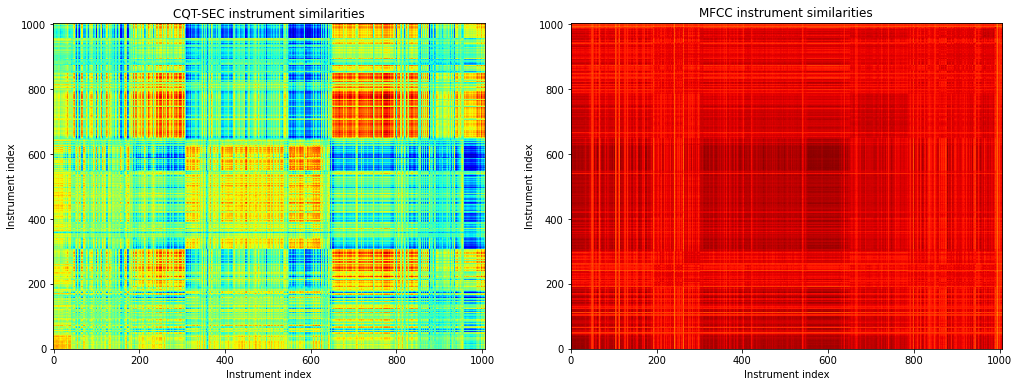

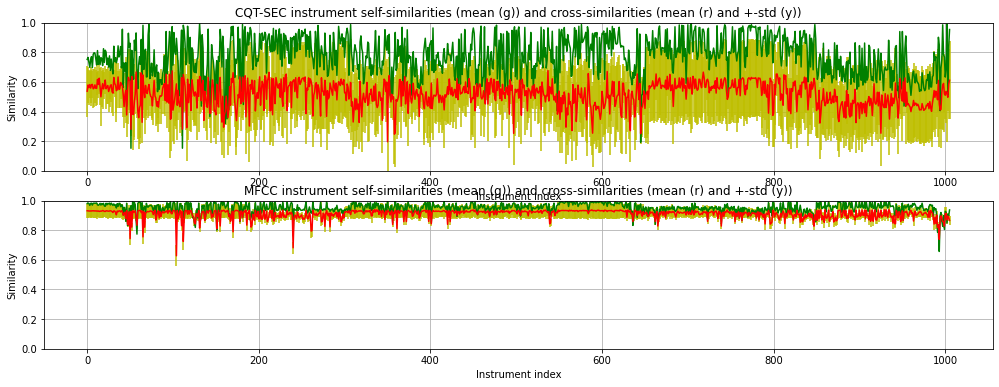

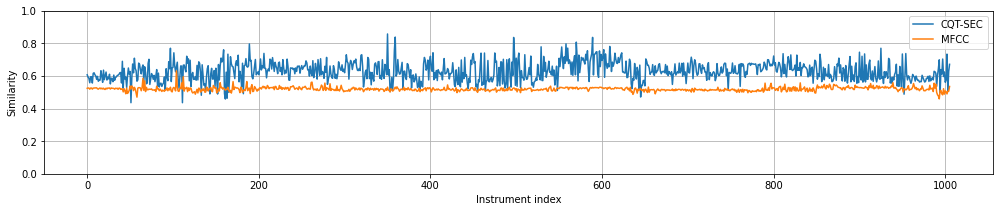

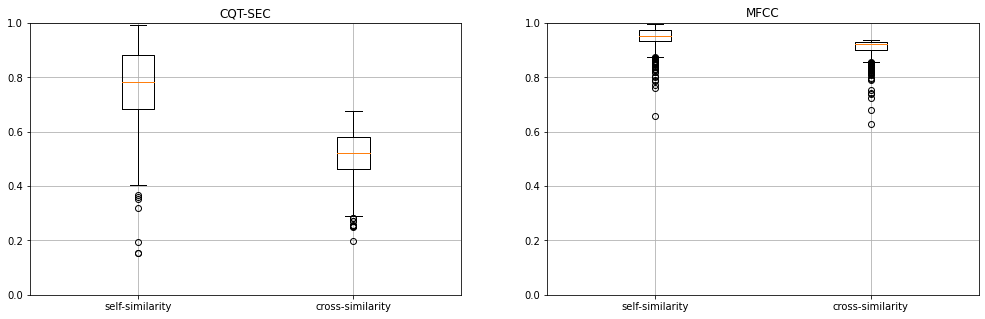

CQT-SEC score: 0.6288421211839742
MFCC score: 0.5196804365082942


In [60]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the instrument similarities
audio_dict = pickle.load(open('instrument_similarities.pkl', 'rb'))
cqtsec_similarities = audio_dict['cqt-sec']
mfcc_similarities = audio_dict['mfcc']

# Display the instrument similarities
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.title('CQT-SEC instrument similarities')
plt.xlabel('Instrument index')
plt.ylabel('Instrument index')
plt.subplot(1, 2, 2)
plt.imshow(mfcc_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.title('MFCC instrument similarities')
plt.xlabel('Instrument index')
plt.ylabel('Instrument index')
plt.show()


# Compute the self and cross-similarities for the CQT-SECs and the MFCCs
cqtsec_selfsimilarities = np.diag(cqtsec_similarities)
cqtsec_crosssimilarities = cqtsec_similarities[~np.eye(number_instruments, dtype=bool)].reshape(number_instruments,-1)
mfcc_selfsimilarities = np.diag(mfcc_similarities)
mfcc_crosssimilarities = mfcc_similarities[~np.eye(number_instruments, dtype=bool)].reshape(number_instruments,-1)

# Display the self-similarities and cross-similarities (with mean and +-std)
plt.figure(figsize=(17, 6))
plt.subplot(2, 1, 1)
plt.errorbar(np.arange(number_instruments), np.mean(cqtsec_crosssimilarities, axis=1), \
             yerr=np.std(cqtsec_crosssimilarities, axis=1), ecolor='y', color='r')
plt.plot(cqtsec_selfsimilarities, color='g')
plt.ylim(0, 1)
plt.grid()
plt.title('CQT-SEC instrument self-similarities (mean (g)) and cross-similarities (mean (r) and +-std (y))')
plt.xlabel('Instrument index')
plt.ylabel('Similarity')
plt.subplot(2, 1, 2)
plt.errorbar(np.arange(number_instruments), np.mean(mfcc_crosssimilarities, axis=1), \
             yerr=np.std(mfcc_crosssimilarities, axis=1), ecolor='y', color='r')
plt.plot(mfcc_selfsimilarities, color='g')
plt.ylim(0, 1)
plt.grid()
plt.title('MFCC instrument self-similarities (mean (g)) and cross-similarities (mean (r) and +-std (y))')
plt.xlabel('Instrument index')
plt.ylabel('Similarity')
plt.show()


# Compute the instrument similarity scores ((mean self-similarities + 1-mean cross-similarities)/2)
cqtsec_scores = (np.diag(cqtsec_similarities)\
                 +1-(np.sum(cqtsec_similarities, axis=0)-np.diag(cqtsec_similarities))/(number_instruments-1))/2
mfcc_scores = (np.diag(mfcc_similarities)\
               +1-(np.sum(mfcc_similarities, axis=0)-np.diag(mfcc_similarities))/(number_instruments-1))/2

# Display the instrument similarity scores
plt.figure(figsize=(17, 3))
plt.plot(cqtsec_scores, label='CQT-SEC')
plt.plot(mfcc_scores, label='MFCC')
plt.ylim(0, 1)
plt.grid()
plt.xlabel('Instrument index')
plt.ylabel('Similarity')
plt.legend()
plt.show()


# Display the distributions for the instrument similarity scores
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.boxplot([cqtsec_selfsimilarities, np.mean(cqtsec_crosssimilarities, axis=1)])
plt.ylim(0, 1)
plt.xticks(np.arange(1, 2+1), ['self-similarity', 'cross-similarity'])
plt.grid()
plt.title('CQT-SEC')
plt.subplot(1, 2, 2)
plt.boxplot([mfcc_selfsimilarities, np.mean(mfcc_crosssimilarities, axis=1)])
plt.ylim(0, 1)
plt.xticks(np.arange(1, 2+1), ['self-similarity', 'cross-similarity'])
plt.grid()
plt.title('MFCC')
plt.show()

# Display the overall scores
print(f'CQT-SEC score: {np.mean(cqtsec_scores)}')
print(f'MFCC score: {np.mean(mfcc_scores)}')

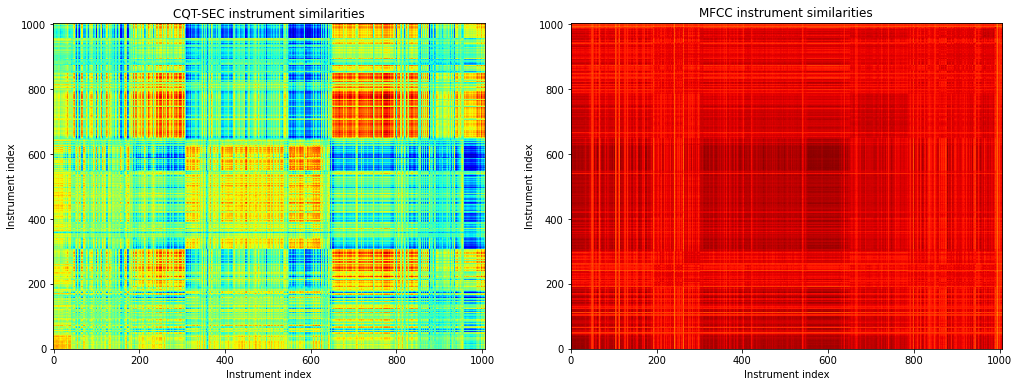

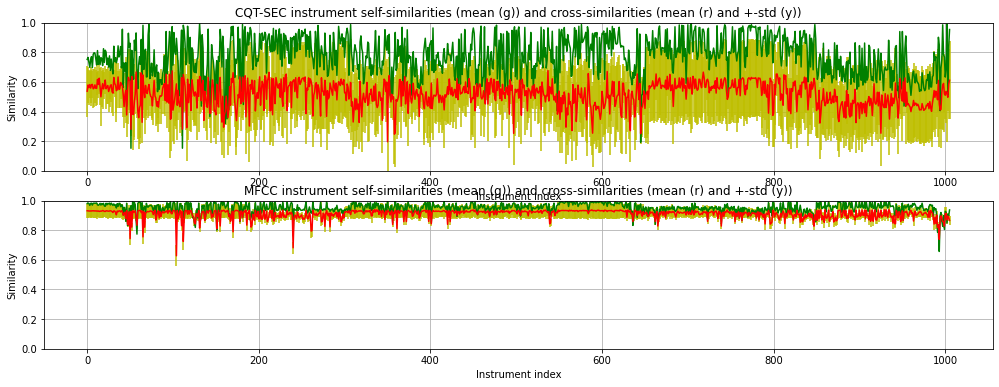

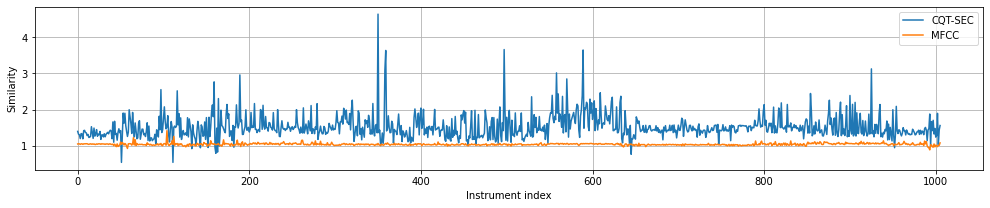

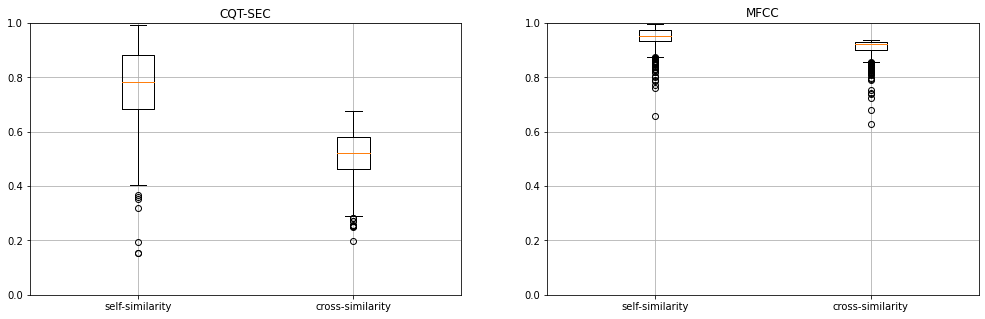

CQT-SEC score: 1.5226458165472703
MFCC score: 1.0435622835166571


In [66]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the instrument similarities
audio_dict = pickle.load(open('instrument_similarities.pkl', 'rb'))
cqtsec_similarities = audio_dict['cqt-sec']
mfcc_similarities = audio_dict['mfcc']

# Display the instrument similarities
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.title('CQT-SEC instrument similarities')
plt.xlabel('Instrument index')
plt.ylabel('Instrument index')
plt.subplot(1, 2, 2)
plt.imshow(mfcc_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.title('MFCC instrument similarities')
plt.xlabel('Instrument index')
plt.ylabel('Instrument index')
plt.show()


# Compute the self and cross-similarities for the CQT-SECs and the MFCCs
cqtsec_selfsimilarities = np.diag(cqtsec_similarities)
cqtsec_crosssimilarities = cqtsec_similarities[~np.eye(number_instruments, dtype=bool)].reshape(number_instruments,-1)
mfcc_selfsimilarities = np.diag(mfcc_similarities)
mfcc_crosssimilarities = mfcc_similarities[~np.eye(number_instruments, dtype=bool)].reshape(number_instruments,-1)

# Display the self-similarities and cross-similarities (with mean and +-std)
plt.figure(figsize=(17, 6))
plt.subplot(2, 1, 1)
plt.errorbar(np.arange(number_instruments), np.mean(cqtsec_crosssimilarities, axis=1), \
             yerr=np.std(cqtsec_crosssimilarities, axis=1), ecolor='y', color='r')
plt.plot(cqtsec_selfsimilarities, color='g')
plt.ylim(0, 1)
plt.grid()
plt.title('CQT-SEC instrument self-similarities (mean (g)) and cross-similarities (mean (r) and +-std (y))')
plt.xlabel('Instrument index')
plt.ylabel('Similarity')
plt.subplot(2, 1, 2)
plt.errorbar(np.arange(number_instruments), np.mean(mfcc_crosssimilarities, axis=1), \
             yerr=np.std(mfcc_crosssimilarities, axis=1), ecolor='y', color='r')
plt.plot(mfcc_selfsimilarities, color='g')
plt.ylim(0, 1)
plt.grid()
plt.title('MFCC instrument self-similarities (mean (g)) and cross-similarities (mean (r) and +-std (y))')
plt.xlabel('Instrument index')
plt.ylabel('Similarity')
plt.show()


# Compute the instrument similarity scores ((mean self-similarities + 1-mean cross-similarities)/2)
cqtsec_scores = np.diag(cqtsec_similarities)/((np.sum(cqtsec_similarities, axis=0)-np.diag(cqtsec_similarities))/(number_instruments-1))
mfcc_scores = np.diag(mfcc_similarities)/((np.sum(mfcc_similarities, axis=0)-np.diag(mfcc_similarities))/(number_instruments-1))

# Display the instrument similarity scores
plt.figure(figsize=(17, 3))
plt.plot(cqtsec_scores, label='CQT-SEC')
plt.plot(mfcc_scores, label='MFCC')
plt.grid()
plt.xlabel('Instrument index')
plt.ylabel('Similarity')
plt.legend()
plt.show()


# Display the distributions for the instrument similarity scores
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.boxplot([cqtsec_selfsimilarities, np.mean(cqtsec_crosssimilarities, axis=1)])
plt.ylim(0, 1)
plt.xticks(np.arange(1, 2+1), ['self-similarity', 'cross-similarity'])
plt.grid()
plt.title('CQT-SEC')
plt.subplot(1, 2, 2)
plt.boxplot([mfcc_selfsimilarities, np.mean(mfcc_crosssimilarities, axis=1)])
plt.ylim(0, 1)
plt.xticks(np.arange(1, 2+1), ['self-similarity', 'cross-similarity'])
plt.grid()
plt.title('MFCC')
plt.show()

# Display the overall scores
print(f'CQT-SEC score: {np.mean(cqtsec_scores)}')
print(f'MFCC score: {np.mean(mfcc_scores)}')

### 04.4. Derive the class similarities for the CQT-SECs and the MFCCs for all the dataset

In [29]:
import os
import pickle
import numpy as np

# Get the path to the folder of features and the list of files
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_features'
folder_listdir = os.listdir(folder_path)

# Initialize the instrument index and previous unique name
j = -1
instrument_name0 = '0'

# Initialize the class index and previous unique name
k = -1
class_name0 = '0'

# Initialize two arrays for the class indices for all the instruments and all the files
number_instruments = 1006
number_files = len(folder_listdir)
class_indices = [np.empty(number_instruments, dtype=int), np.empty(number_files, dtype=int)]

# Initialize an array for the number of notes per class
number_classes = 11
note_counters = np.zeros(number_classes)

# Loop over the files
for i in range(number_files):
    
    # Get the name of the instrument
    instrument_name = folder_listdir[i].split('-')[0]
    
    # If it is a new instrument
    if instrument_name != instrument_name0:
        
        # Update the instrument counter and the previous unique name
        j = j+1
        instrument_name0 = instrument_name
        
    # Get the name of the class
    class_name = folder_listdir[i].split('_')[0]
    
    # If it is a new class
    if class_name != class_name0:
        
        # Update the class counter and the previous unique name
        k = k+1
        class_name0 = class_name
    
    # Update the class index for the current instrument and file
    class_indices[0][j] = k
    class_indices[1][i] = k
    
    # Update the note counter
    note_counters[k] = note_counters[k]+1
    
# Get the path to the folder of similarities and the list of files
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth_similarities'
folder_listdir = os.listdir(folder_path)
    
# Initialize the class similarities for the CQT-SECs and the MFCCs
cqtsec_similarities = np.zeros((number_classes, number_classes))
mfcc_similarities = np.zeros((number_classes, number_classes))

# Loop over the files
i = 0
for file_name in folder_listdir:
    
    # Display the name of the file
#     print(f'{i+1}/{number_files}: {file_name}')
    
    # Get the full path to the similarity file and load the dictionary
    file_path = os.path.join(folder_path, file_name)
    audio_dict = pickle.load(open(file_path, 'rb'))
    
    # Get the class index per file
    j = class_indices[1][i]
    
    # Loop over the files again
    for l in range(number_instruments):
        
        # Get the class index per instrument
        k = class_indices[0][l]
        
        # Update the class similarities
        cqtsec_similarities[j, k] = cqtsec_similarities[j, k] + audio_dict['cqt-sec'][l]
        mfcc_similarities[j, k] = mfcc_similarities[j, k] + audio_dict['mfcc'][l]
        
        if cqtsec_similarities[j, k]<0:
            print(audio_dict['cqt-sec'][l])
        
    # Update the counter
    i = i+1
    
# Recover the whole class similarity matrices
cqtsec_similarities = cqtsec_similarities+np.eye(number_classes)+cqtsec_similarities.T
mfcc_similarities = mfcc_similarities+np.eye(number_classes)+mfcc_similarities.T

# Derive the number of pairs of notes used for the similarities for all the pairs of classes
note_pairs = note_counters*note_counters[:, None]

# Normalize the class similarity matrices
cqtsec_similarities = cqtsec_similarities/note_pairs
mfcc_similarities = mfcc_similarities/note_pairs

# Create a dictionary and save the instrument similarities
audio_dict = {'cqt-sec': cqtsec_similarities, 'mfcc': mfcc_similarities}
pickle.dump(audio_dict, open('class_similarities.pkl','wb'))

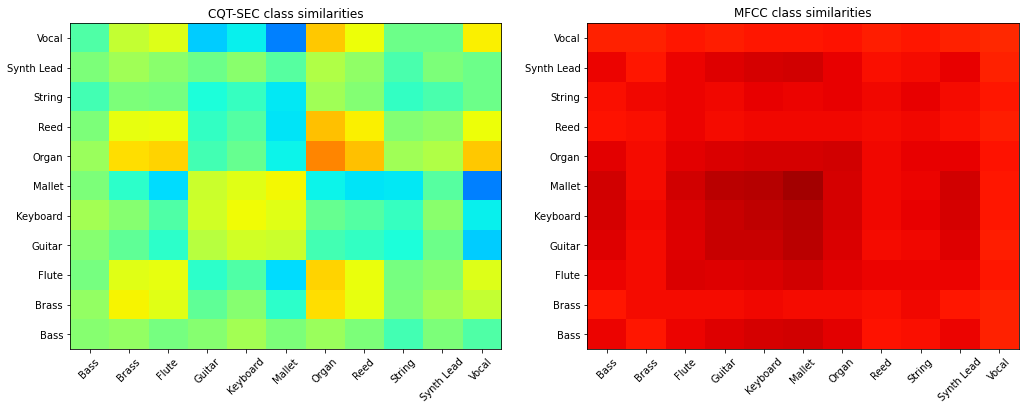

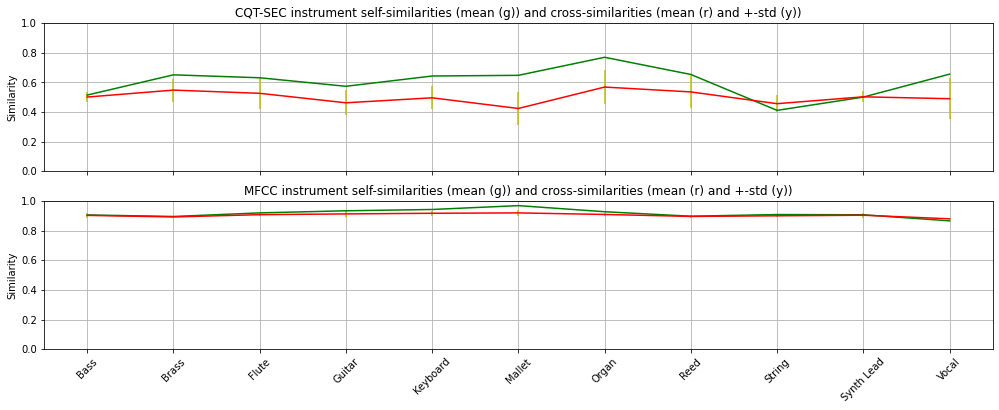

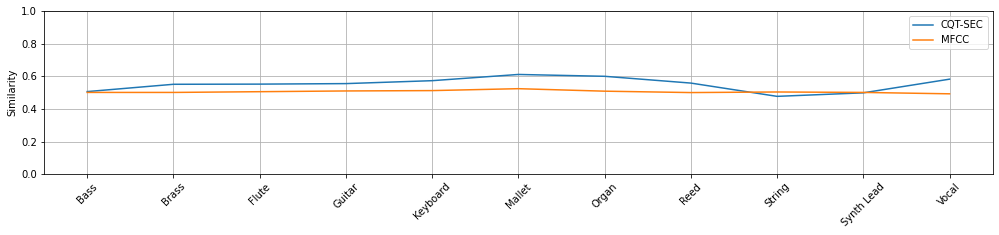

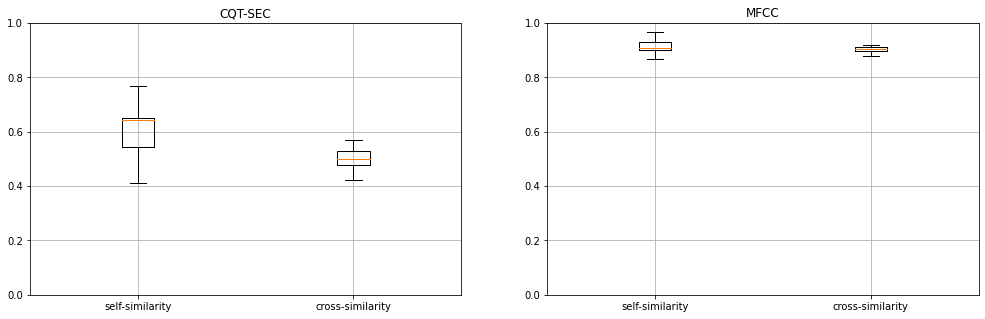

CQT-SEC score: 0.5518398440180589
MFCC score: 0.5059784299297592


In [64]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the instrument similarities
audio_dict = pickle.load(open('class_similarities.pkl', 'rb'))
cqtsec_similarities = audio_dict['cqt-sec']
mfcc_similarities = audio_dict['mfcc']

# Display the instrument similarities
class_names = ['Bass', 'Brass', 'Flute', 'Guitar', 'Keyboard', 'Mallet', 'Organ', 'Reed', 'String', 'Synth Lead', 'Vocal']
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.xticks(np.arange(number_classes), class_names, rotation=45)
plt.yticks(np.arange(number_classes), class_names)
plt.title('CQT-SEC class similarities')
plt.subplot(1, 2, 2)
plt.imshow(mfcc_similarities, cmap="jet", aspect="auto", vmin=0, vmax=1, origin="lower")
plt.xticks(np.arange(number_classes), class_names, rotation=45)
plt.yticks(np.arange(number_classes), class_names)
plt.title('MFCC class similarities')
plt.show()


# Compute the self and cross-similarities for the CQT-SECs and the MFCCs
cqtsec_selfsimilarities = np.diag(cqtsec_similarities)
cqtsec_crosssimilarities = cqtsec_similarities[~np.eye(number_classes, dtype=bool)].reshape(number_classes,-1)
mfcc_selfsimilarities = np.diag(mfcc_similarities)
mfcc_crosssimilarities = mfcc_similarities[~np.eye(number_classes, dtype=bool)].reshape(number_classes,-1)

# Display the self-similarities and cross-similarities (with mean and +-std)
plt.figure(figsize=(17, 6))
plt.subplot(2, 1, 1)
plt.errorbar(np.arange(number_classes), np.mean(cqtsec_crosssimilarities, axis=1), \
             yerr=np.std(cqtsec_crosssimilarities, axis=1), ecolor='y', color='r')
plt.plot(cqtsec_selfsimilarities, color='g')
plt.ylim(0, 1)
plt.grid()
plt.title('CQT-SEC instrument self-similarities (mean (g)) and cross-similarities (mean (r) and +-std (y))')
plt.xticks(np.arange(number_classes), [])
plt.ylabel('Similarity')
plt.subplot(2, 1, 2)
plt.errorbar(np.arange(number_classes), np.mean(mfcc_crosssimilarities, axis=1), \
             yerr=np.std(mfcc_crosssimilarities, axis=1), ecolor='y', color='r')
plt.plot(mfcc_selfsimilarities, color='g')
plt.ylim(0, 1)
plt.grid()
plt.title('MFCC instrument self-similarities (mean (g)) and cross-similarities (mean (r) and +-std (y))')
plt.xticks(np.arange(number_classes), class_names, rotation=45)
plt.ylabel('Similarity')
plt.show()


# Compute the class similarity scores ((mean self-similarities + 1-mean cross-similarities)/2)
cqtsec_scores = (np.diag(cqtsec_similarities)\
                 +1-(np.sum(cqtsec_similarities, axis=0)-np.diag(cqtsec_similarities))/(number_classes-1))/2
mfcc_scores = (np.diag(mfcc_similarities)\
               +1-(np.sum(mfcc_similarities, axis=0)-np.diag(mfcc_similarities))/(number_classes-1))/2

# Display the instrument similarity scores
plt.figure(figsize=(17, 3))
plt.plot(cqtsec_scores, label='CQT-SEC')
plt.plot(mfcc_scores, label='MFCC')
plt.ylim(0, 1)
plt.grid()
plt.xticks(np.arange(number_classes), class_names, rotation=45)
plt.ylabel('Similarity')
plt.legend()
plt.show()


# Display the distributions for the instrument similarity scores
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.boxplot([cqtsec_selfsimilarities, np.mean(cqtsec_crosssimilarities, axis=1)])
plt.ylim(0, 1)
plt.xticks(np.arange(1, 2+1), ['self-similarity', 'cross-similarity'])
plt.grid()
plt.title('CQT-SEC')
plt.subplot(1, 2, 2)
plt.boxplot([mfcc_selfsimilarities, np.mean(mfcc_crosssimilarities, axis=1)])
plt.ylim(0, 1)
plt.xticks(np.arange(1, 2+1), ['self-similarity', 'cross-similarity'])
plt.grid()
plt.title('MFCC')
plt.show()

# Display the overall scores
print(f'CQT-SEC score: {np.mean(cqtsec_scores)}')
print(f'MFCC score: {np.mean(mfcc_scores)}')